In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.svm import OneClassSVM as OCSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor as LOF

from SupervisedAD_methods import *
from kdd import *

# Data Preprocessing

In [2]:
path_train = '../../data/KDDTrain+.txt'

df = get_df(path_train, columns=columns, drop=False)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
path_test = '../../data/KDDTest+.txt'

test_df = get_df(path_test, columns=columns, drop=False)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [4]:
#  https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# map normal to 1, all attacks to 0
is_normal = df.attack.map(lambda a: 1 if a == 'normal' else 0)
test_normal = test_df.attack.map(lambda a: 1 if a == 'normal' else 0)

df['normal_flag'] = is_normal
test_df['normal_flag'] = test_normal

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# get numeric features, we won't worry about encoding these at this point
# numeric_features = ['duration', 'src_bytes', 'dst_bytes']
# Use all features
numeric_features = list(set(df.columns[:-5]) - set(features_to_encode))


def feat_eng(df, test_df, features_to_encode=features_to_encode, numeric_features=numeric_features):
#     https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

    # get the intial set of encoded features and encode them
    encoded = pd.get_dummies(df[features_to_encode])
    test_encoded_base = pd.get_dummies(test_df[features_to_encode])

    # not all of the features are in the test set, so we need to account for diffs
    test_index = np.arange(len(test_df.index))
    column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

    diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

    # we'll also need to reorder the columns to match, so let's get those
    column_order = encoded.columns.to_list()

    # append the new columns
    test_encoded_temp = test_encoded_base.join(diff_df)

    # reorder the columns
    test_final = test_encoded_temp[column_order].fillna(0)

    # model to fit/test
    to_fit = encoded.join(df[numeric_features])
    test_set = test_final.join(test_df[numeric_features])
    
    return to_fit, test_set

In [5]:
data_train, data_test = feat_eng(df, test_df)
data_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,srv_rerror_rate,su_attempted,num_outbound_cmds,srv_diff_host_rate,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,duration,dst_host_count,srv_serror_rate,num_file_creations
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.00,0.17,0.00,0,150,0.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0.00,0.88,0.00,0,255,0.0,0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.00,0.00,0.00,0,255,1.0,0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.00,0.03,0.01,0,30,0.2,0
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.09,0.00,0.00,0,255,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.00,0.00,0.00,0,255,1.0,0
125969,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0.00,0.01,0.00,8,255,0.0,0
125970,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.00,0.00,0.00,0,255,0.0,0
125971,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.00,0.00,0.00,0,255,1.0,0


In [6]:
df['attack_map'].value_counts()

0    67352
1    45927
2    11656
4      995
3       43
Name: attack_map, dtype: int64

In [7]:
test_df['attack_map'].value_counts()

0    9855
1    7460
4    2743
2    2421
3      65
Name: attack_map, dtype: int64

In [8]:
scaler = StandardScaler()

x_train, y = get_x_y(df, data_train)
X = scaler.fit_transform(x_train)

np.random.seed(0)
np.random.shuffle(X)
np.random.seed(0)
np.random.shuffle(y)

x_testing, y_test = get_x_y(test_df, data_test, classes=test_classes)
x_test = scaler.transform(x_testing)

In [9]:
num_normal = np.sum(y)
print("Baseline train AUPR: ", 1 - num_normal/len(y))

num_normal = np.sum(y_test)
print("Baseline overall AUPR: ", 1 - num_normal/len(y_test))

val_counts = test_df['attack_map'].value_counts()[1:]

for att in new_attacks:
    num_att = val_counts[att]
    print(f"Baseline AUPR {att}: ", num_att/(num_normal + num_att))

Baseline train AUPR:  0.405512054308389
Baseline overall AUPR:  0.5692423704755145
Baseline AUPR 1:  0.43445343893774385
Baseline AUPR 2:  0.19955489614243324
Baseline AUPR 3:  0.006648936170212766
Baseline AUPR 4:  0.22025052192066805


# Modelling

## Shallow Models

In [10]:
from sklearn.svm import SVC

svm = SVC(C=1.0, kernel='rbf', gamma='scale')
svm.fit(X, y)
y_train = svm.predict(X)
y_pred = svm.predict(x_test)

In [11]:
aupr_train = get_metrics(y_train, y, model.name, plot=plot)
aupr_test = get_metrics(y_pred, y_test, model.name, plot=plot)

plt.title("Histogram for Predictions on Test Data")
y_pred_pos = y_pred[y_test == 1].squeeze()
y_pred_neg = y_pred[y_test == 0].squeeze()
plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
plt.legend()
plt.show()


indiv=new_attacks
att_labels=test_df['attack_map']
# get indiv auprs for different attacks
y_normal = len(y_pred_pos)

aupr_attacks = []
for att in indiv:
    y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
    aupr_attacks.append(
        get_metrics(
            np.hstack((y_pred_pos, y_att)), 
            np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
            model.name, plot=plot)
    )

display(pd.DataFrame(data={"SVM": aupr_attacks}))

print(f"AUPR Train Run: {aupr_train}")
print(f"AUPR Test Run: {aupr_test}")
print(f"AUPR Indiv Test Run: {aupr_attacks}")

In [12]:
from itertools import product
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import time

def cross_validate_unsupervised(Model, params_dict, model_name, seed=0, plot=False, folds=10):

    param_names = list(params_dict.keys())
    param_values = (zip(param_names, x) for x in product(*params_dict.values()))

    param_list = []
    cv_scores = []

    for paramset in param_values:
        
        params = dict(paramset)
        print("Params:", params)

        cv_scores.append(calculate_cv_score(Model, params, seed=seed, folds=folds))

        param_list.append(params)

    print("Get Min CV Score")
    i = np.argmin(cv_scores)
    params = param_list[i]
    
    # Visualization
    if seed:
        model = Model(random_state=seed, **params)
    else:
        model = Model(**params)
    
    model.fit(X)
    
    print("Train")
    y_pred = model.score_samples(X)
    eval_plot(y, y_pred, model_name)

    print("Test")
    y_pred = model.score_samples(x_test)
    eval_plot(y_test, y_pred, model_name)

    y_pred_pos = y_pred[y_test == 1]
    y_pred_neg = y_pred[y_test == 0]
    plt.hist(y_pred_neg, bins=10, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=10, label="Positive", alpha=0.5)
    plt.legend()
    plt.show()

    if plot:
        y_pred = model.score_samples(data_viz)
        viz_boundary(data_viz, y_pred, grid=grid, model_name=model_name)
    
    return params


def calculate_cv_score(Model, params, seed=0, folds=10):

    kf = StratifiedKFold(n_splits=folds, shuffle=False)

    cv_loss = 0

    for i, (train_indices, val_indices) in enumerate(kf.split(X, y)):
        print("Fold", i+1, end=", ")
        x_train, y_train = X[train_indices], y[train_indices]
        x_val, y_val = X[val_indices], y[val_indices]
        
        start_time = time.time()
        
        if seed:
            model = Model(random_state=seed, **params)
        else:
            model = Model(**params)
        model.fit(x_train)
        
        end_time = time.time()
        print(f"Time: {end_time-start_time}s", end=", ")
        
        y_pred = model.score_samples(x_val)
        loss = metrics.log_loss(y_val, y_pred)
        
        print(f"Loss: {loss}")
        cv_loss += loss
    print(f"Total Loss: {cv_loss}")
    return cv_loss

{'kernel': 'rbf', 'nu': 0.0001, 'gamma': 'scale', 'shrinking': True}


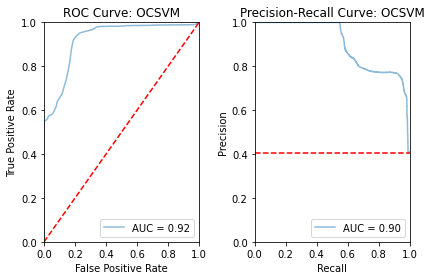

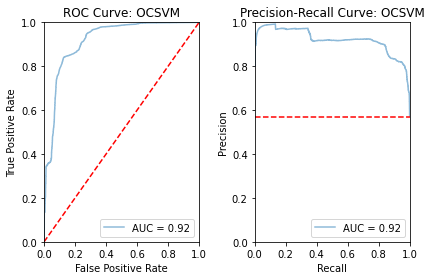

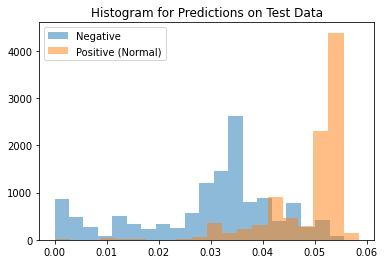

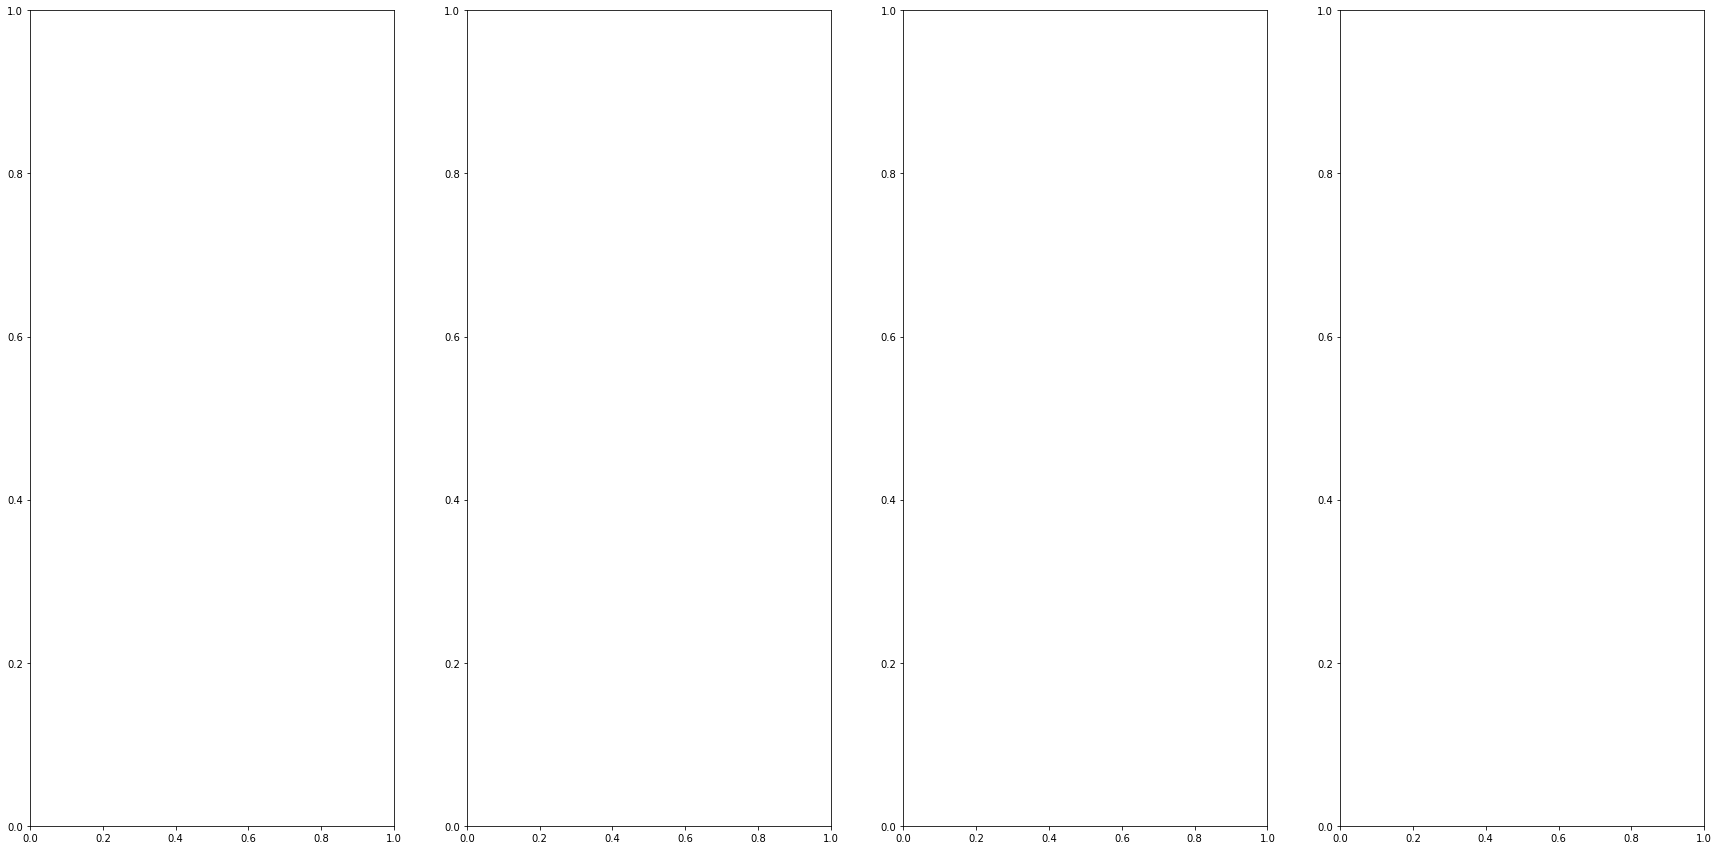

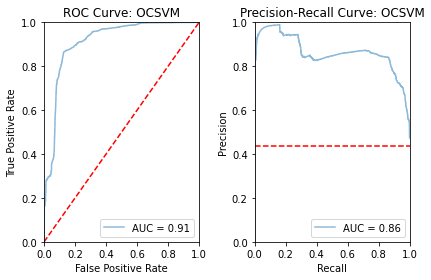

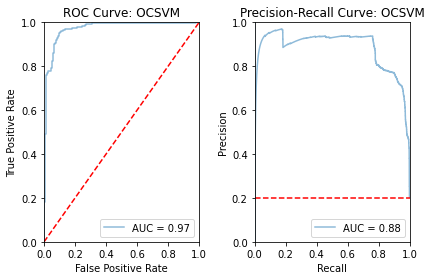

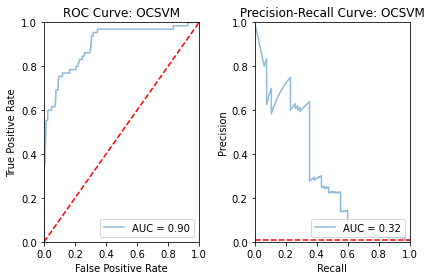

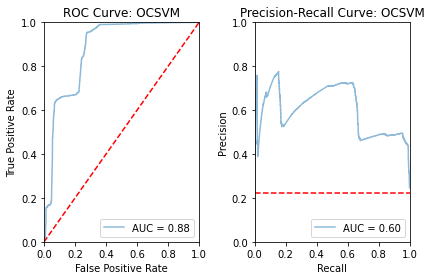

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


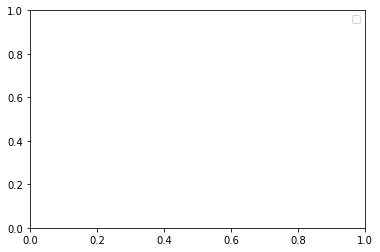

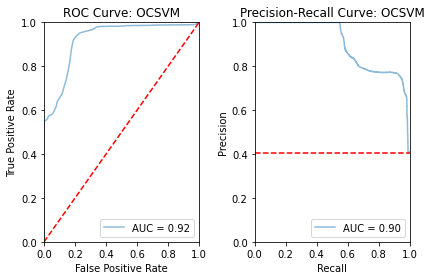

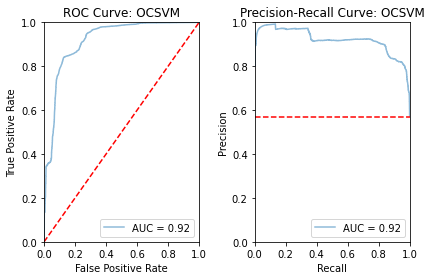

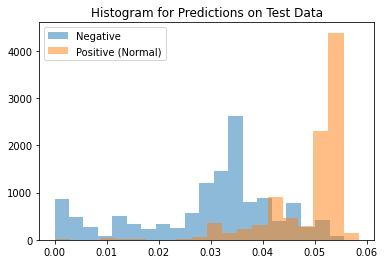

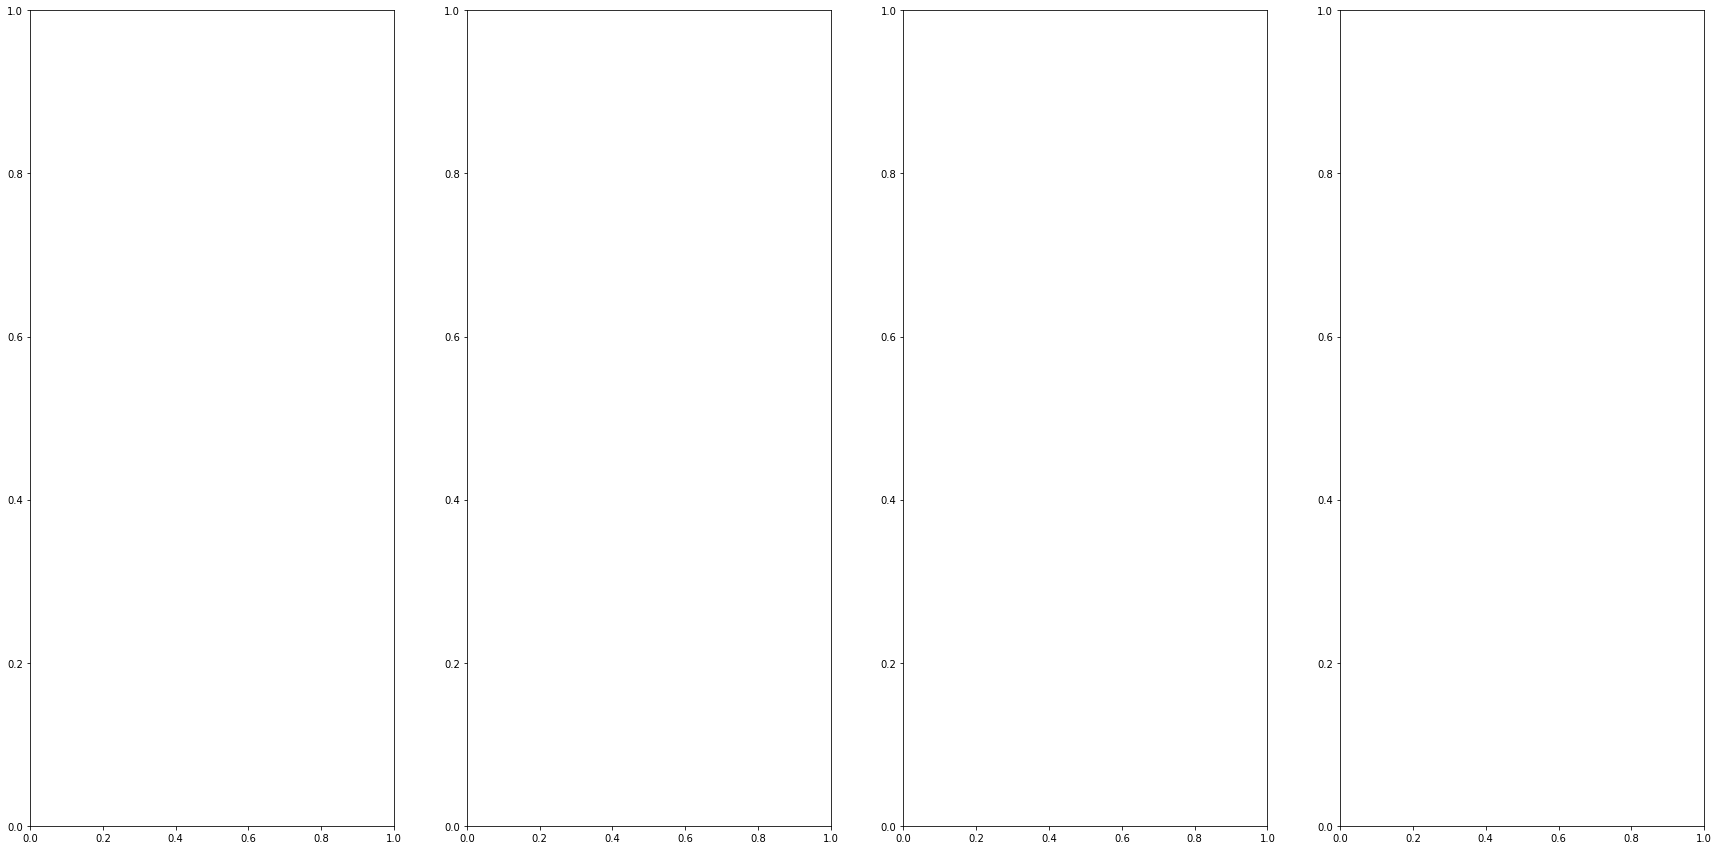

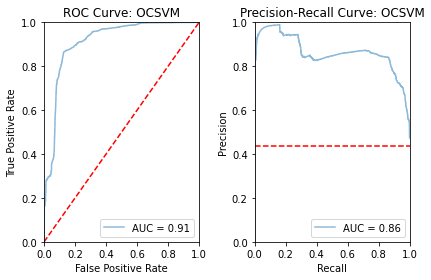

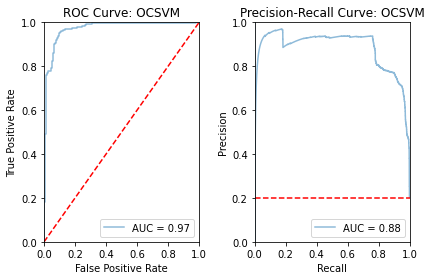

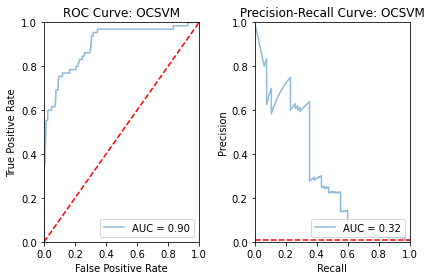

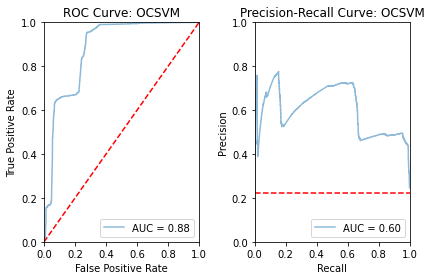

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


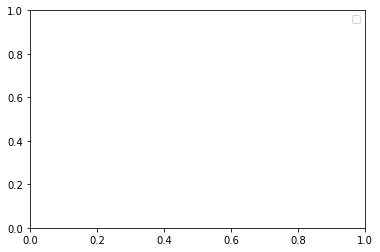

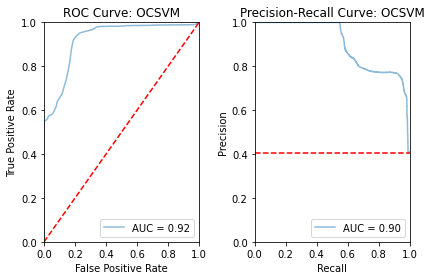

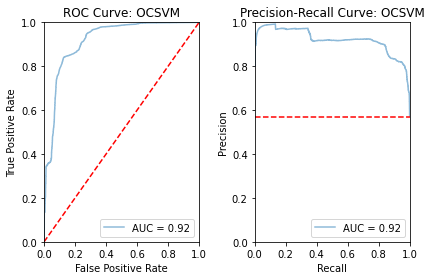

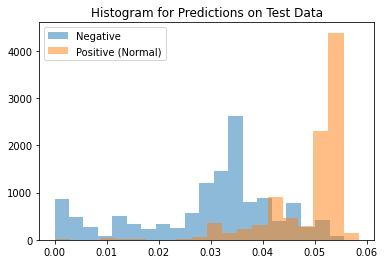

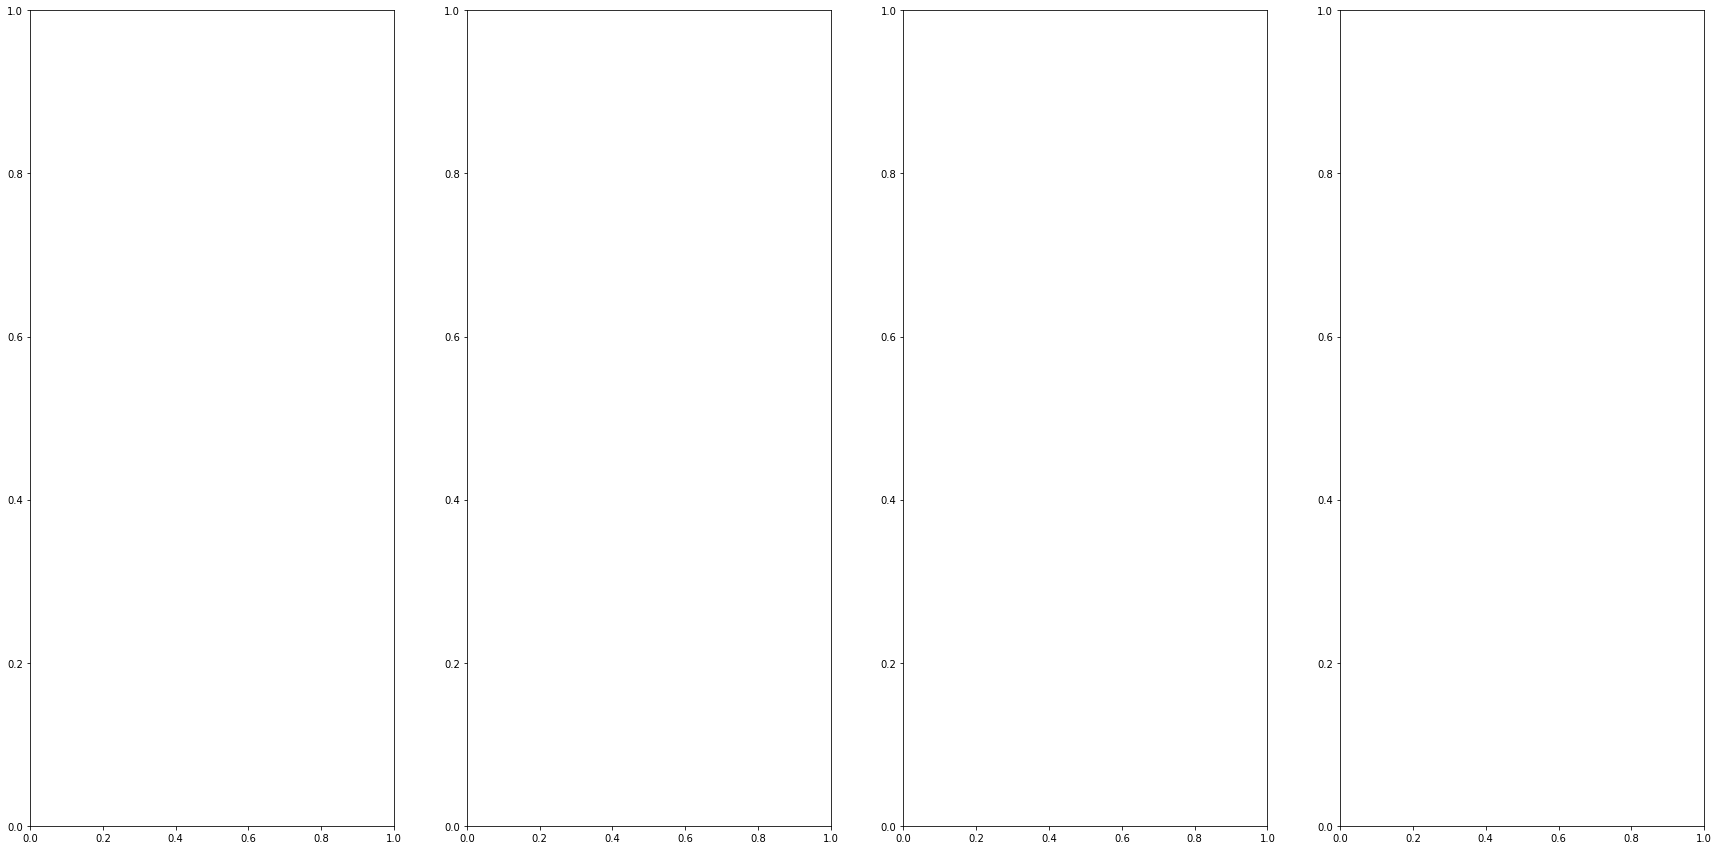

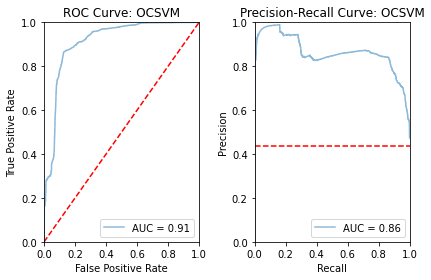

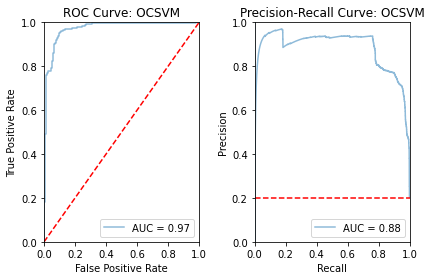

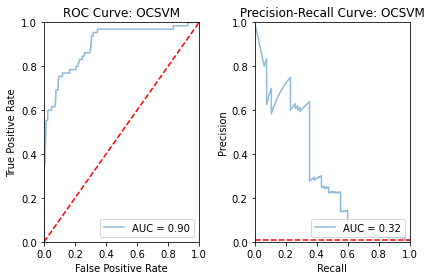

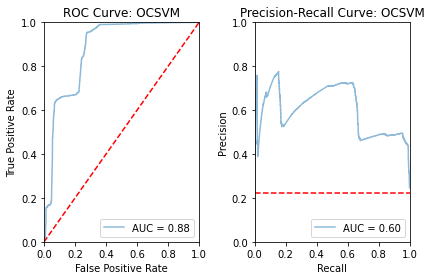

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


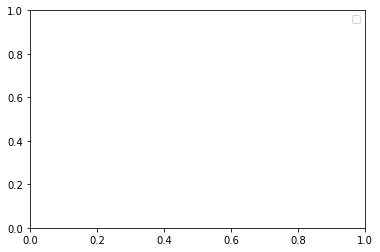

AUPR (Train): 0.9014231349240861+-0.0
AUPR (Test): 0.9212526371086928+-0.0


,0,1,2,AUPR Mean,AUPR Std
1,0.863375,0.863375,0.863375,0.863375,0.0
2,0.879096,0.879096,0.879096,0.879096,0.0
3,0.319080,0.319080,0.319080,0.319080,0.0
4,0.597548,0.597548,0.597548,0.597548,0.0


([0.9014231349240861, 0.9014231349240861, 0.9014231349240861],
 [0.9212526371086928, 0.9212526371086928, 0.9212526371086928],
 {0: [0.8633745547738086,
   0.8790956310497987,
   0.31907983540456597,
   0.5975477089275414],
  1: [0.8633745547738086,
   0.8790956310497987,
   0.31907983540456597,
   0.5975477089275414],
  2: [0.8633745547738086,
   0.8790956310497987,
   0.31907983540456597,
   0.5975477089275414]})

In [13]:
model_name ="OCSVM"
# params_dict = {
#     "kernel": ["rbf"],
#     "nu": [0.0001, 0.25],
#     "gamma": ["auto", "scale"],
#     "shrinking": [True, False]
#          }

# best_params = cross_validate_unsupervised(OCSVM, params_dict, model_name, seed=False)
best_params = {'kernel': 'rbf', 'nu': 0.0001, 'gamma': 'scale', 'shrinking': True}
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = OCSVM(**best_params)
    
    model.fit(X[y == 1])
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

{'kernel': 'rbf', 'nu': 0.405512054308389, 'gamma': 'scale', 'shrinking': True}


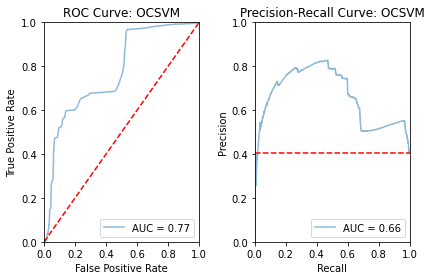

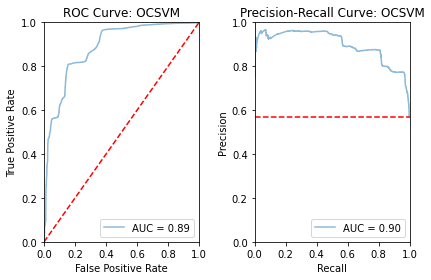

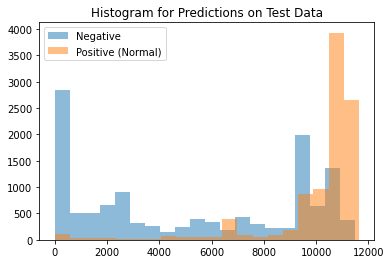

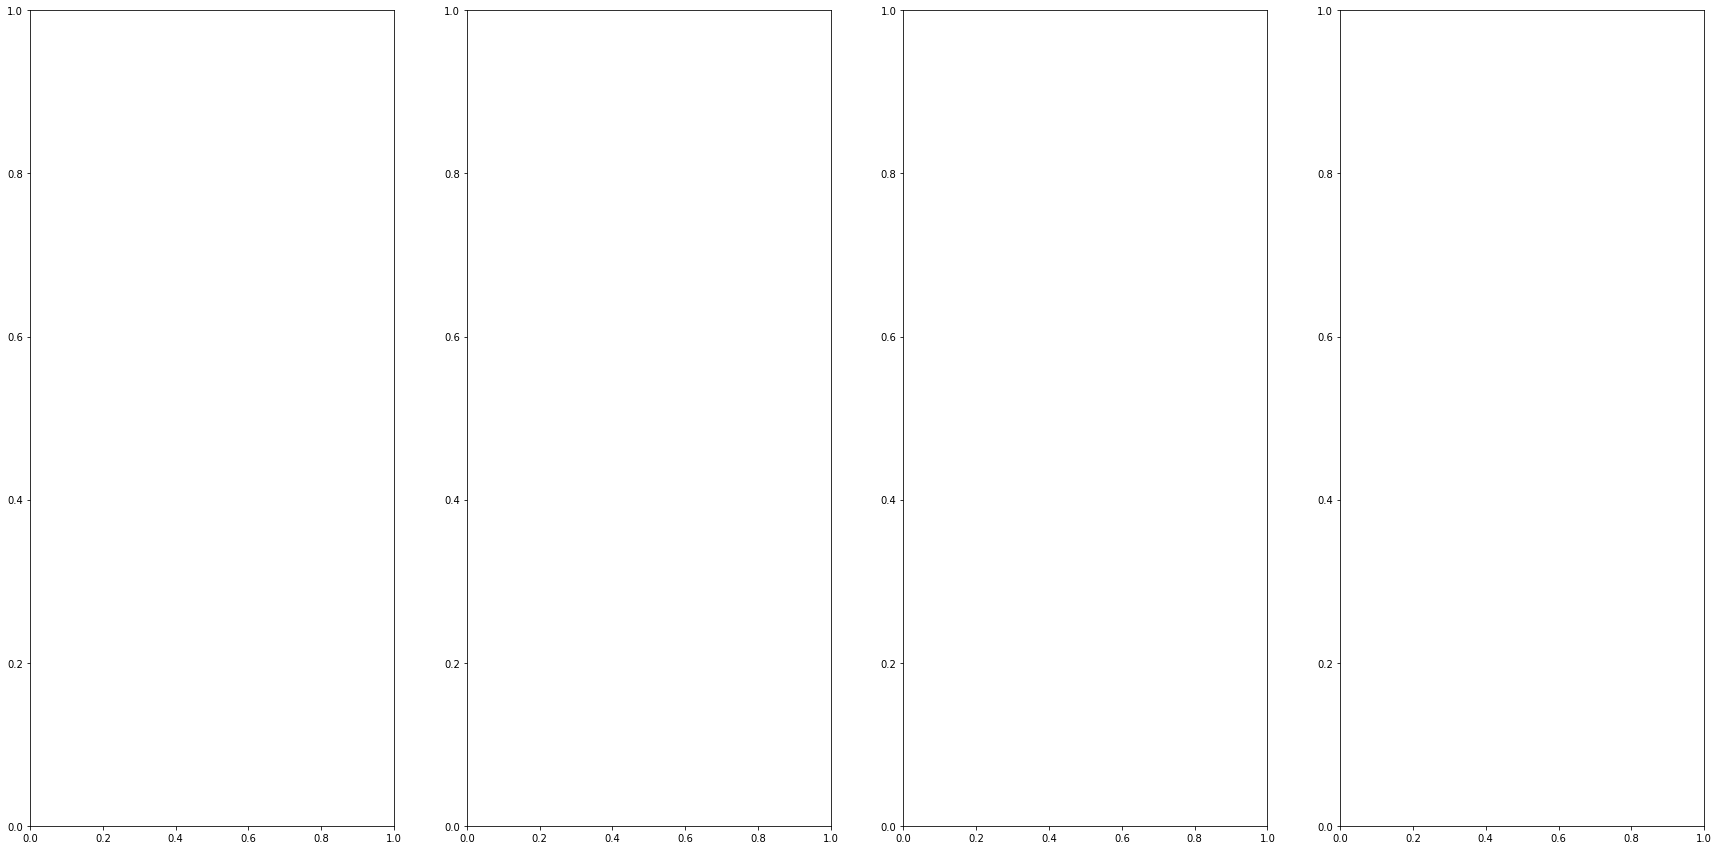

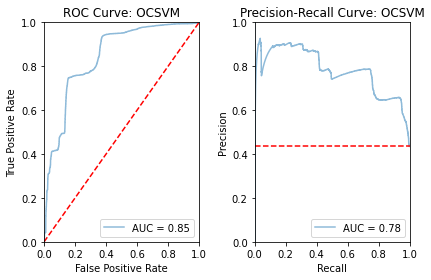

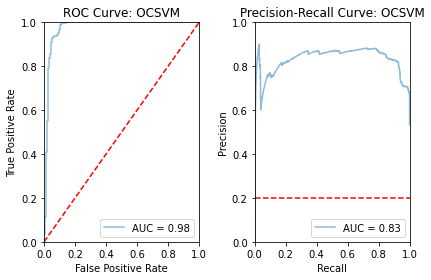

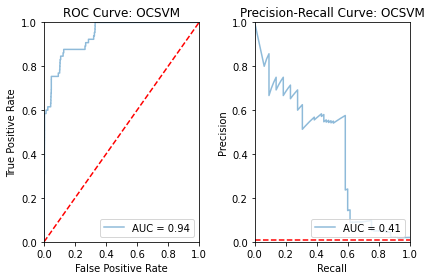

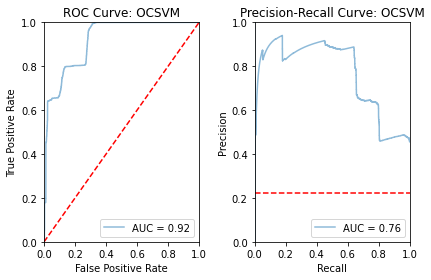

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


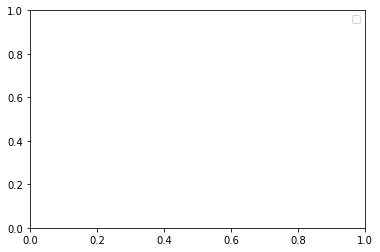

AUPR (Train): 0.657087491546613+-0.0
AUPR (Test): 0.8978973601788409+-0.0


,0,AUPR Mean,AUPR Std
1,0.779561,0.779561,NaN
2,0.829599,0.829599,NaN
3,0.409623,0.409623,NaN
4,0.760425,0.760425,NaN


([0.657087491546613],
 [0.8978973601788409],
 {0: [0.7795606497083171,
   0.8295990348681895,
   0.40962261500393,
   0.7604251464181232]})

In [14]:
model_name ="OCSVM"
# params_dict = {
#     "kernel": ["rbf"],
#     "nu": [0.0001, 0.25],
#     "gamma": ["auto", "scale"],
#     "shrinking": [True, False]
#          }

# best_params = cross_validate_unsupervised(OCSVM, params_dict, model_name, seed=False)
best_params = {'kernel': 'rbf',
               'nu': 1 - np.sum(y)/len(y),
               'gamma': 'scale', 'shrinking': True}
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = OCSVM(**best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Params: {'kernel': 'rbf', 'nu': 0.405512054308389, 'gamma': 'auto', 'shrinking': True}
Fold 1, Time: 986.6963763237s, Loss: 14.009527253924318
Fold 2, Time: 988.7129762172699s, Loss: 14.010235955786253
Fold 3, Time: 983.3874220848083s, Loss: 14.012336509831629
Total Loss: 42.0320997195422
Params: {'kernel': 'rbf', 'nu': 0.405512054308389, 'gamma': 'scale', 'shrinking': True}
Fold 1, Time: 986.0450766086578s, Loss: 14.009662133919646
Fold 2, Time: 982.5204164981842s, Loss: 14.01033939084052
Fold 3, Time: 975.8684074878693s, Loss: 14.012580247351433
Total Loss: 42.0325817721116
Get Min CV Score
Train


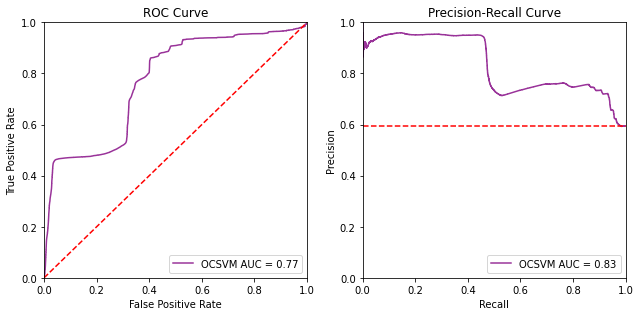

Test


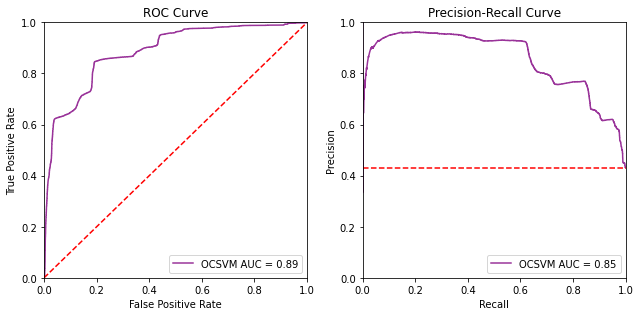

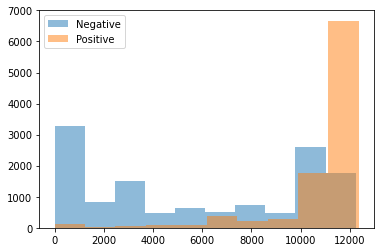

{'kernel': 'rbf', 'nu': 0.405512054308389, 'gamma': 'auto', 'shrinking': True}


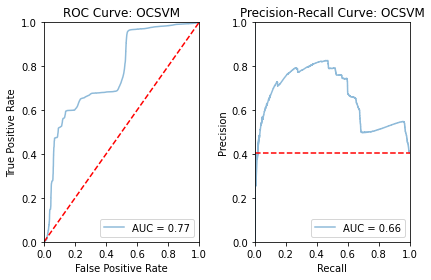

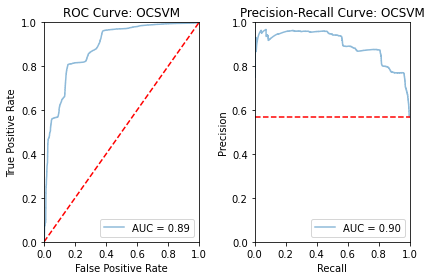

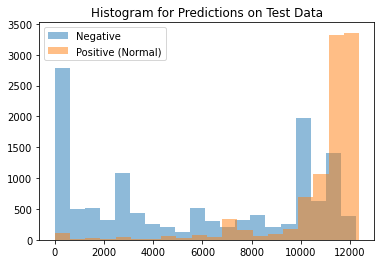

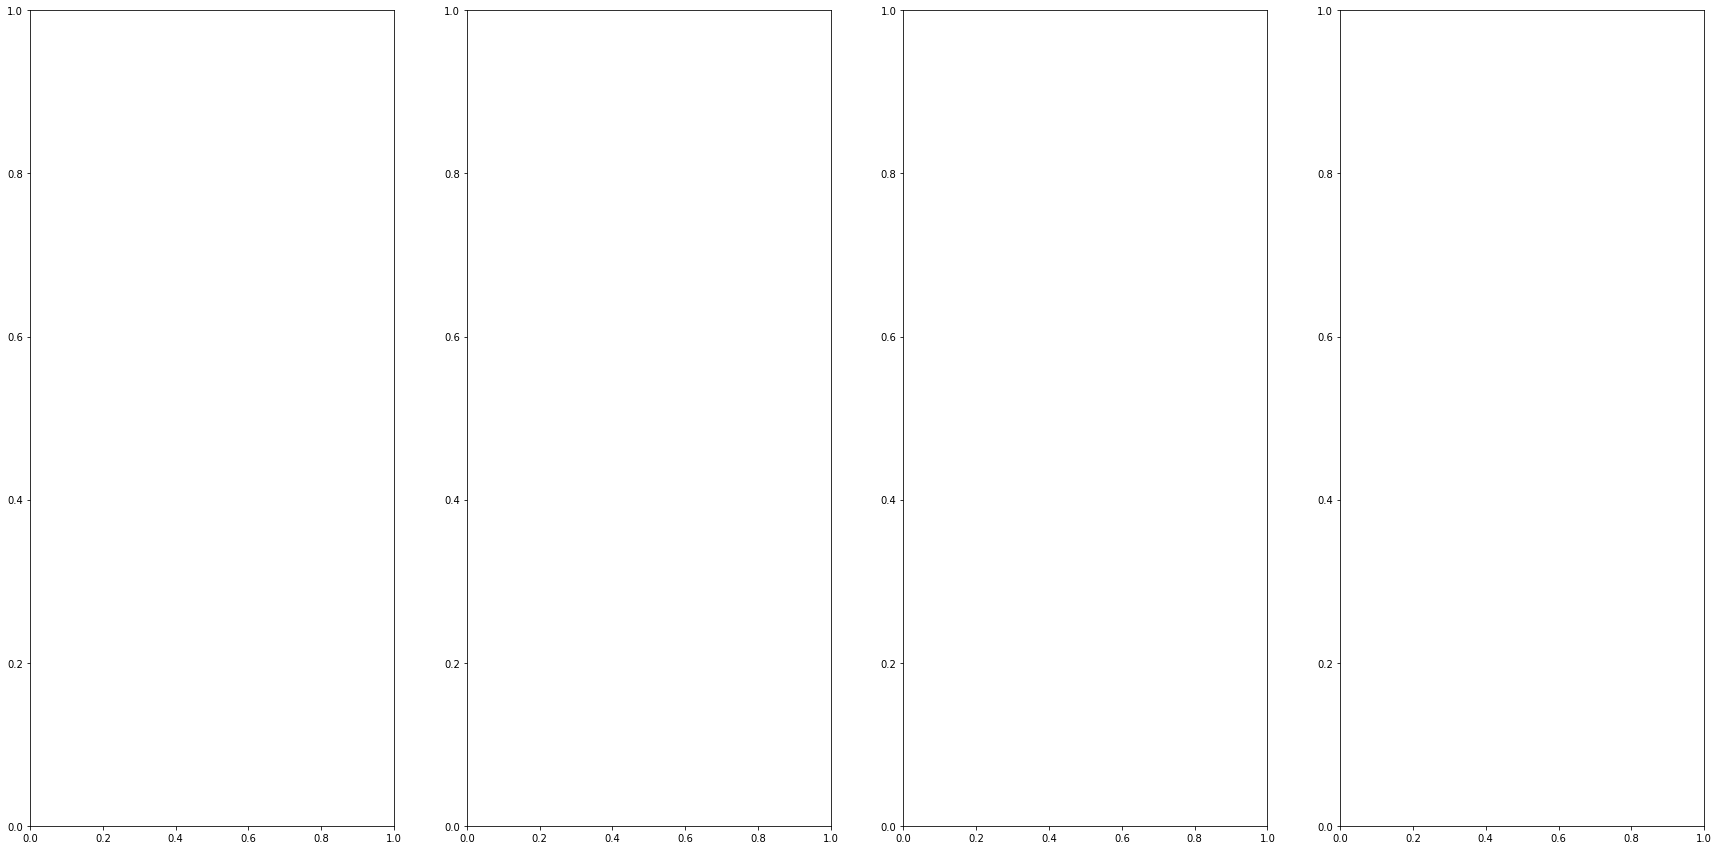

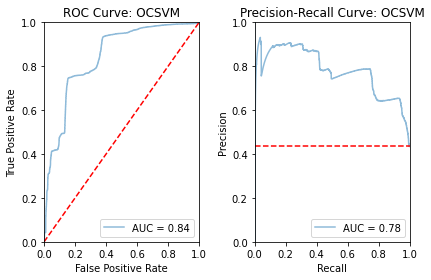

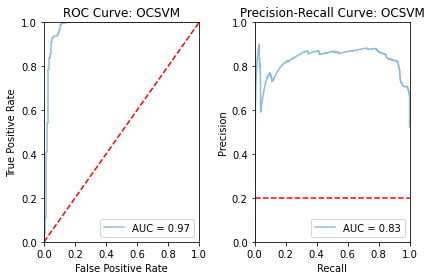

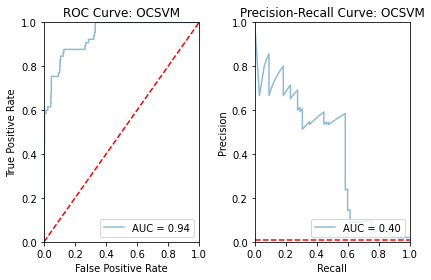

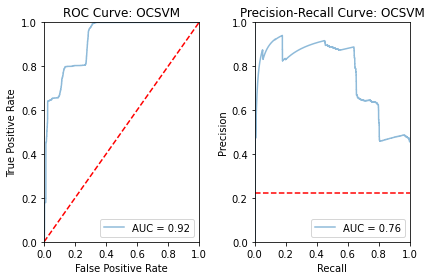

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


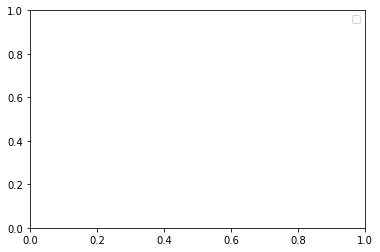

AUPR (Train): 0.6552928402083422+-0.0
AUPR (Test): 0.8973125529798536+-0.0


,0,AUPR Mean,AUPR Std
1,0.778874,0.778874,NaN
2,0.827485,0.827485,NaN
3,0.404611,0.404611,NaN
4,0.760111,0.760111,NaN


([0.6552928402083422],
 [0.8973125529798536],
 {0: [0.7788735663139467,
   0.8274852623693578,
   0.40461107811817776,
   0.7601110844710725]})

In [15]:
# CROSS VALIDATION

model_name ="OCSVM"
params_dict = {
    "kernel": ["rbf"],
    "nu": [1 - np.sum(y)/len(y)],
    "gamma": ["auto", "scale"],
    "shrinking": [True]
         }

best_params = cross_validate_unsupervised(OCSVM, params_dict, model_name, seed=False, folds=3)
# best_params = {'kernel': 'rbf',
#                'nu': 1 - np.sum(y)/len(y),
#                'gamma': 'scale', 'shrinking': True}
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = OCSVM(**best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Params: {'kernel': 'rbf', 'nu': 1e-11, 'gamma': 'auto', 'shrinking': True}
Fold 1, Time: 0.08331561088562012s, Loss: 15.218698333034226
Fold 2, Time: 0.07599711418151855s, Loss: 8.914795770729764
Fold 3, Time: 0.06809306144714355s, Loss: 8.925543048072244
Total Loss: 33.059037151836236
Params: {'kernel': 'rbf', 'nu': 1e-11, 'gamma': 'scale', 'shrinking': True}
Fold 1, Time: 0.23720026016235352s, Loss: 15.627637183465918
Fold 2, Time: 0.24596166610717773s, Loss: 8.928355164210558
Fold 3, Time: 0.2287130355834961s, Loss: 8.975126739909756
Total Loss: 33.531119087586234
Get Min CV Score
Train


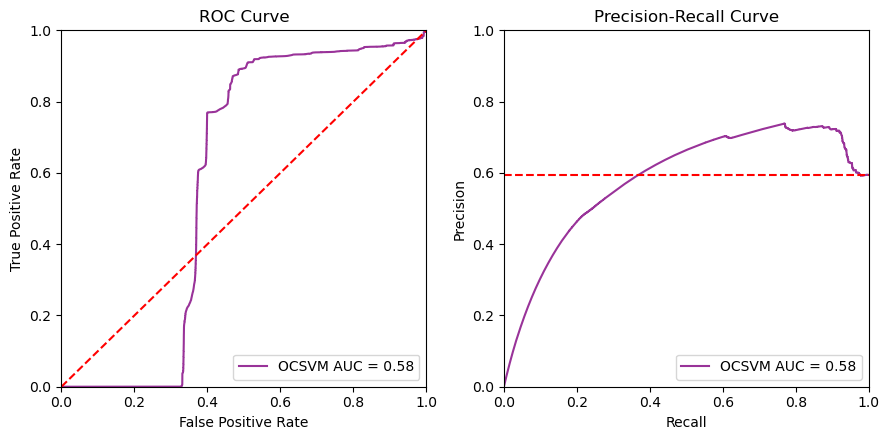

Test


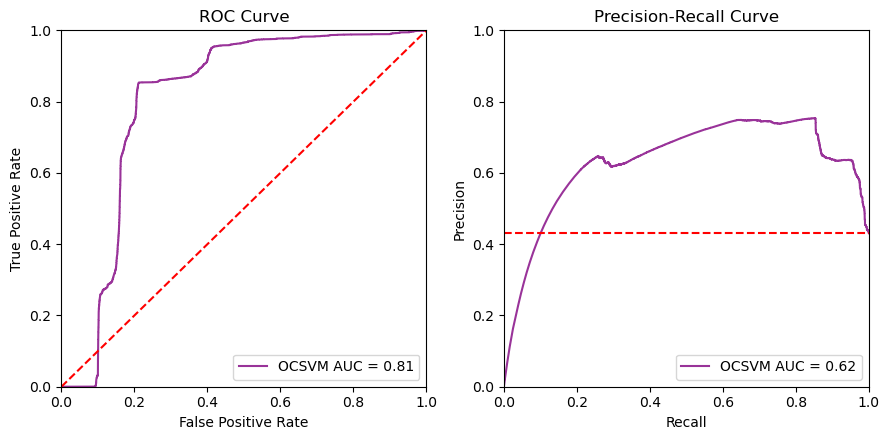

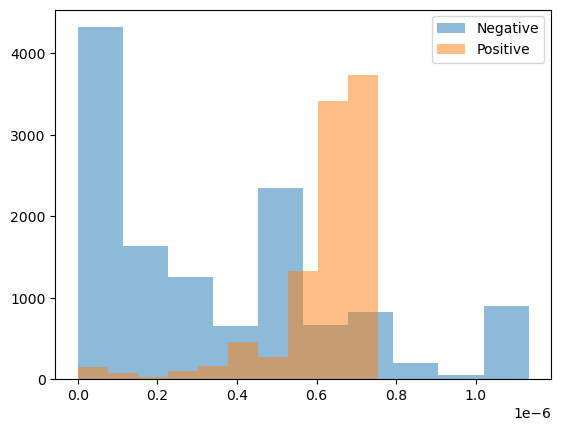

{'kernel': 'rbf', 'nu': 1e-11, 'gamma': 'auto', 'shrinking': True}


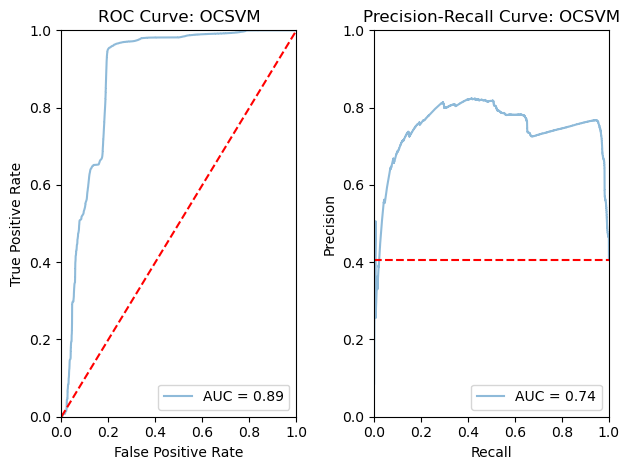

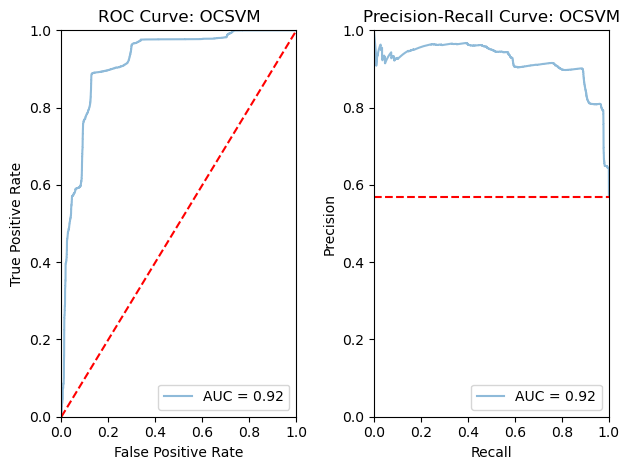

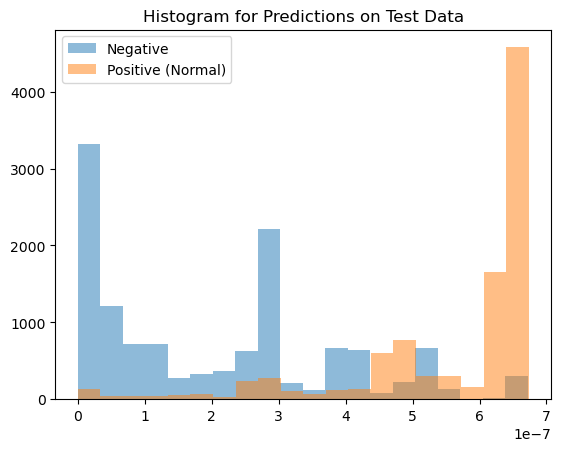

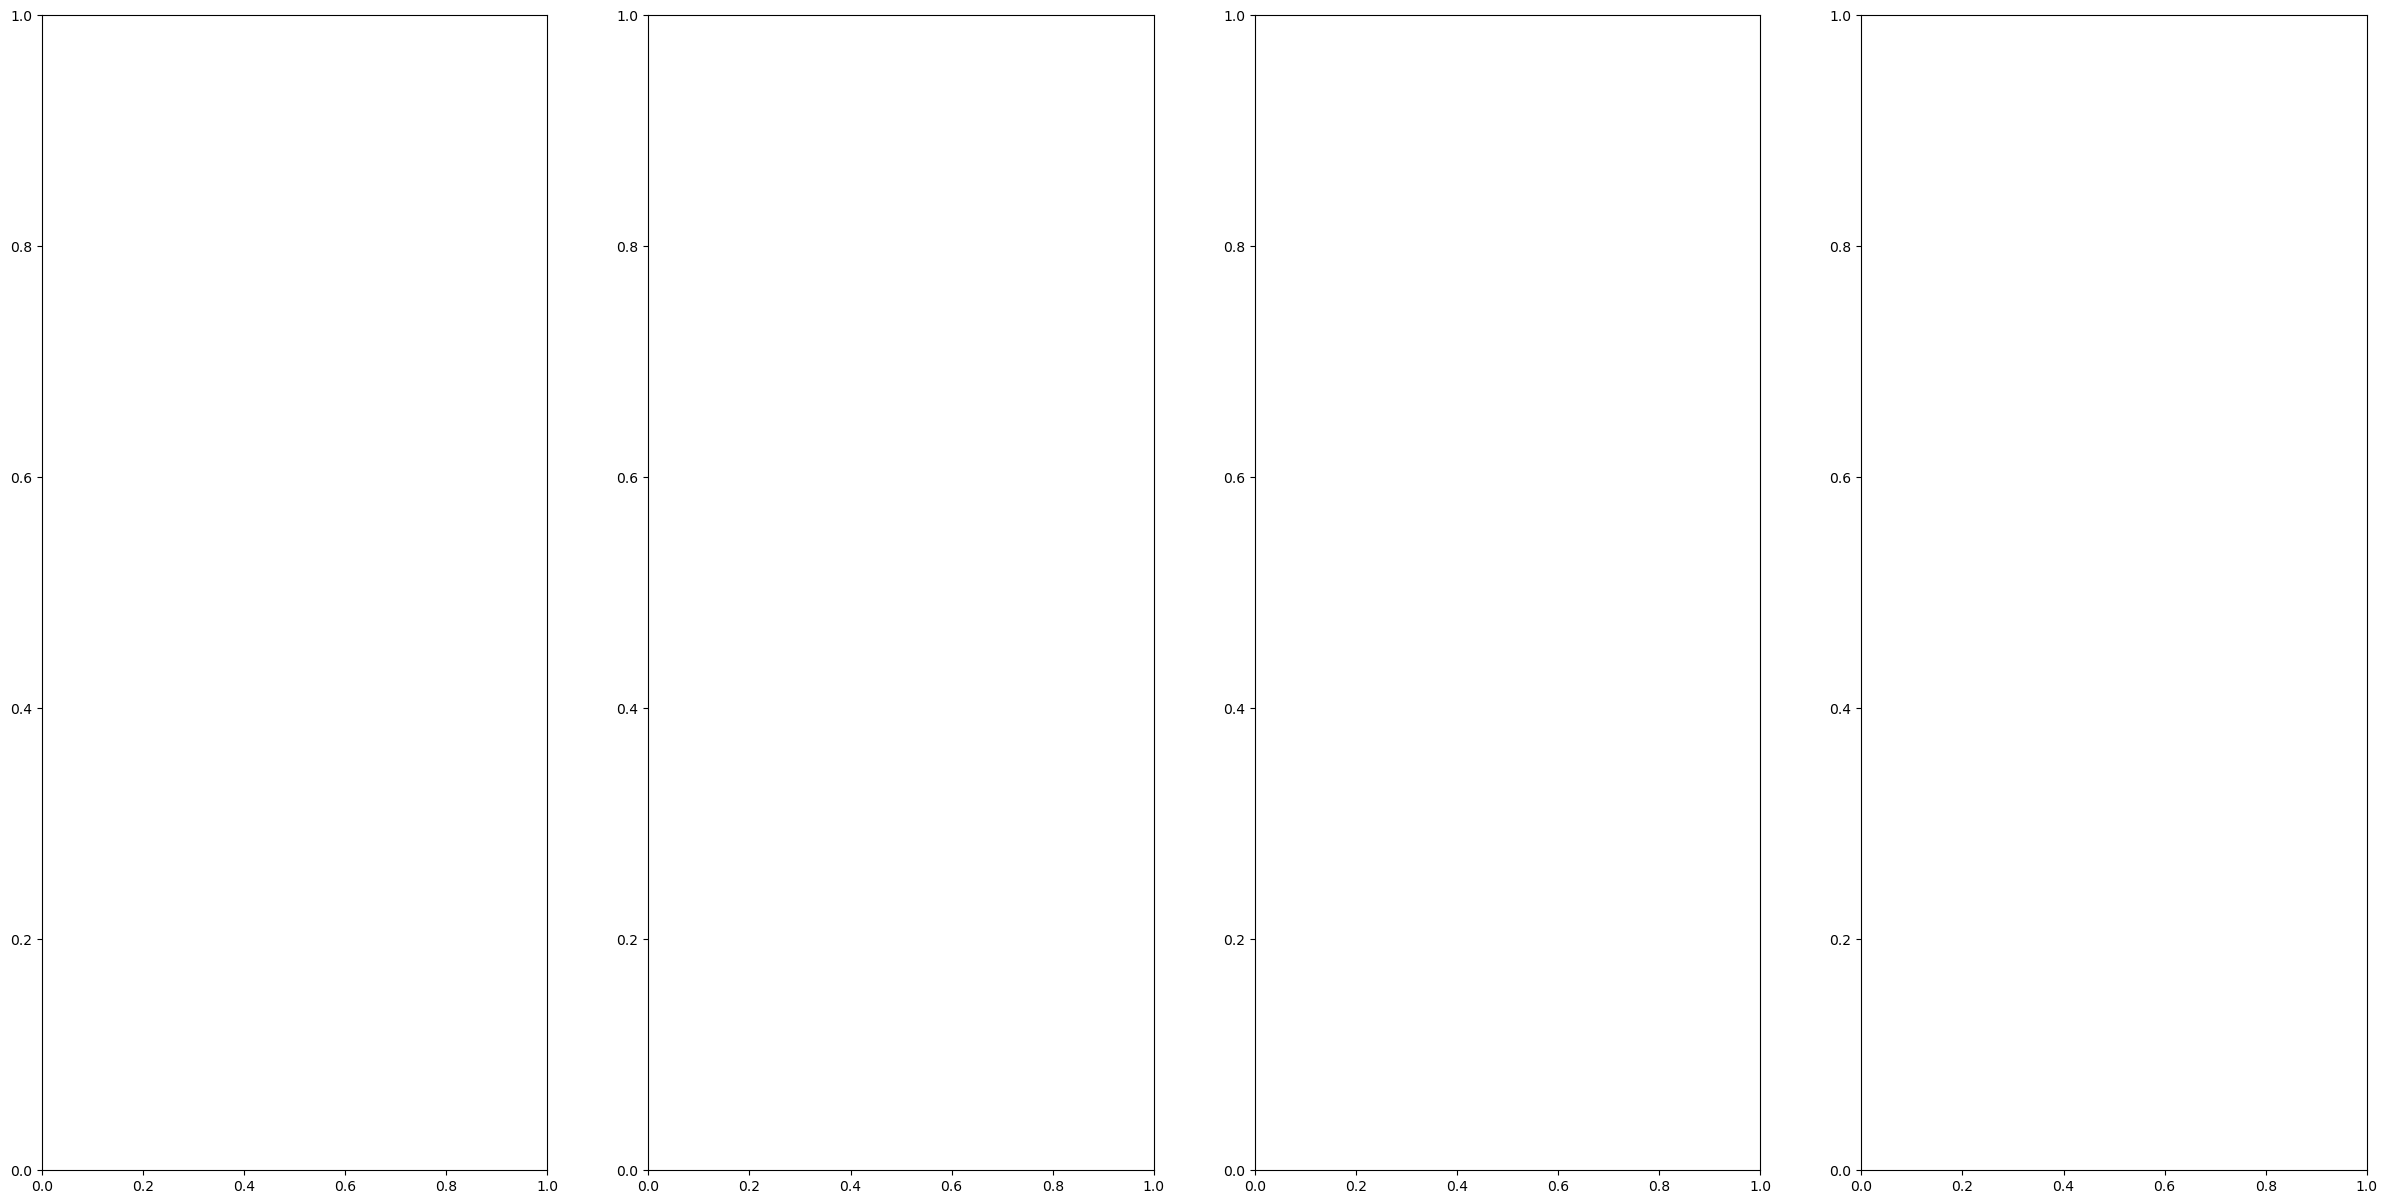

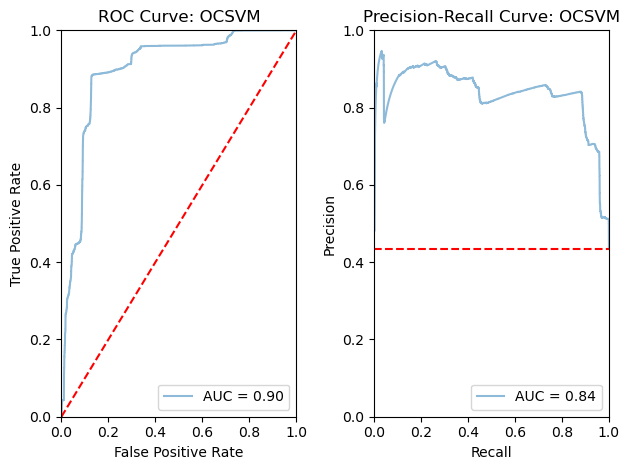

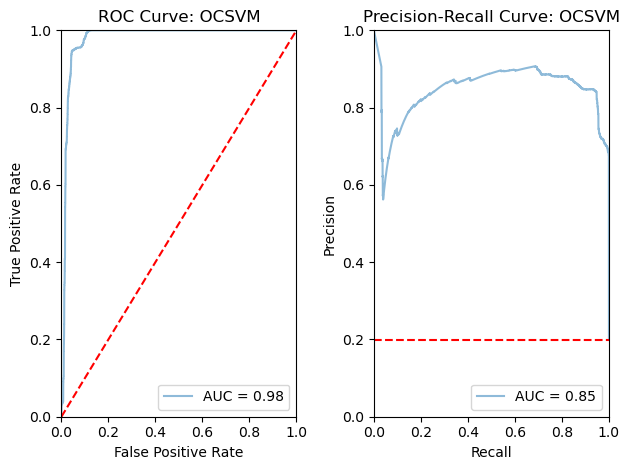

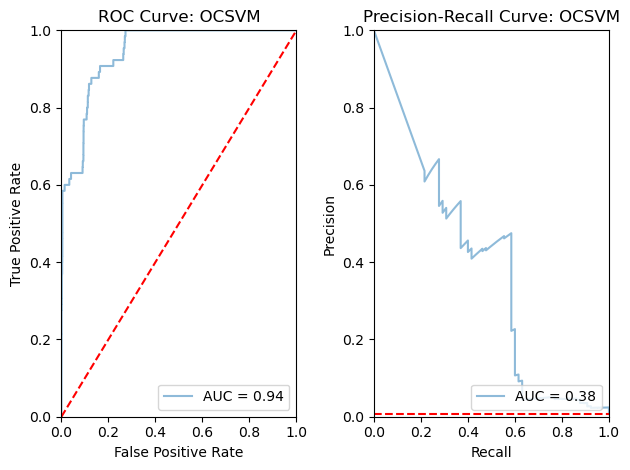

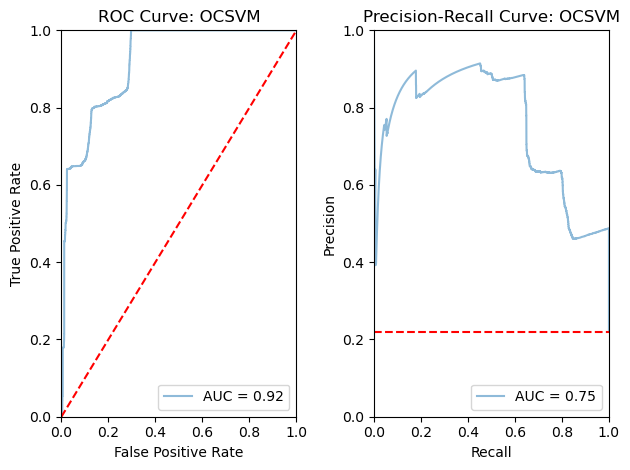

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


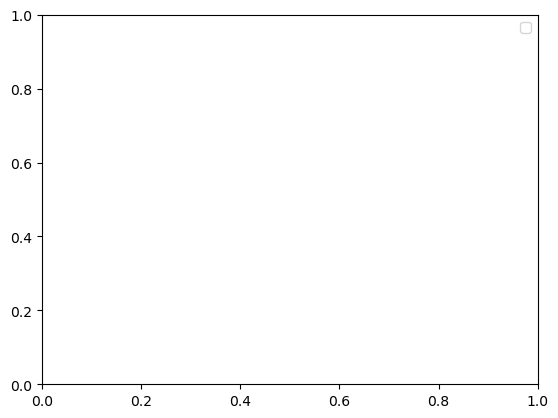

AUPR (Train): 0.74319521485351+-0.0
AUPR (Test): 0.9195074528031113+-0.0


,0,AUPR Mean,AUPR Std
1,0.835292,0.835292,NaN
2,0.846722,0.846722,NaN
3,0.382155,0.382155,NaN
4,0.745096,0.745096,NaN


([0.74319521485351],
 [0.9195074528031113],
 {0: [0.8352924238683158,
   0.8467222062149918,
   0.38215519904416656,
   0.7450960939923835]})

In [16]:
# CROSS VALIDATION

model_name ="OCSVM"
params_dict = {
    "kernel": ["rbf"],
    "nu": [0.00000000001],
    "gamma": ["auto", "scale"],
    "shrinking": [True]
         }

best_params = cross_validate_unsupervised(OCSVM, params_dict, model_name, seed=False, folds=3)
# best_params = {'kernel': 'rbf',
#                'nu': 1 - np.sum(y)/len(y),
#                'gamma': 'scale', 'shrinking': True}
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = OCSVM(**best_params)
    
    model.fit(X[y==1])
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Params: {'n_estimators': 50, 'contamination': 0.0, 'max_samples': 'auto', 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 0.0, 'max_samples': 0.9, 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 0.0, 'max_samples': 1.0, 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 'auto', 'max_samples': 'auto', 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 'auto', 'max_samples': 0.9, 'max_features': 1.0}
Params: {'n_estimators': 50, 'contamination': 'auto', 'max_samples': 1.0, 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 0.0, 'max_samples': 'auto', 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 0.0, 'max_samples': 0.9, 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 0.0, 'max_samples': 1.0, 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 'auto', 'max_samples': 'auto', 'max_features': 1.0}
Params: {'n_estimators': 100, 'contamination': 'auto

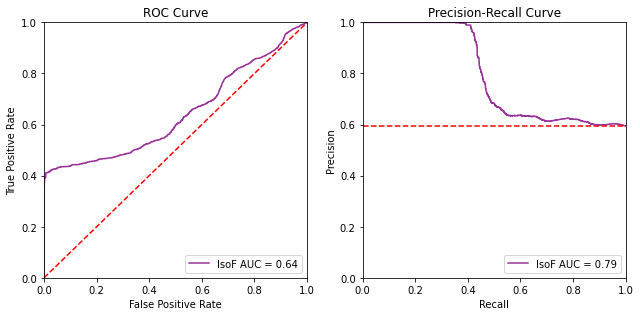

Test


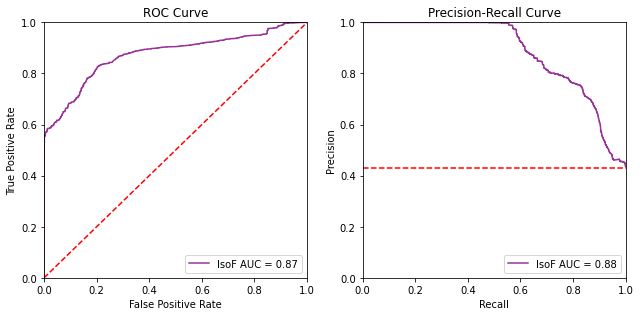

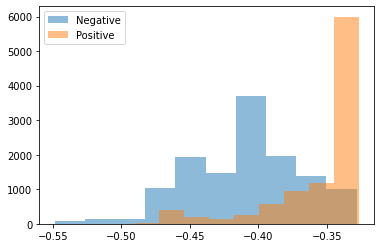

{'n_estimators': 50, 'contamination': 0.0, 'max_samples': 'auto', 'max_features': 1.0}


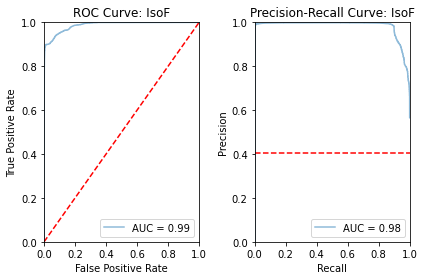

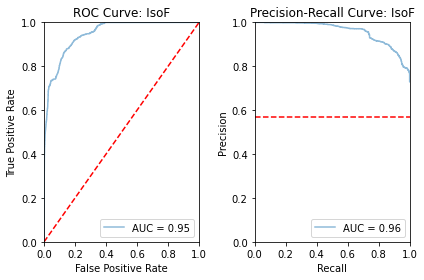

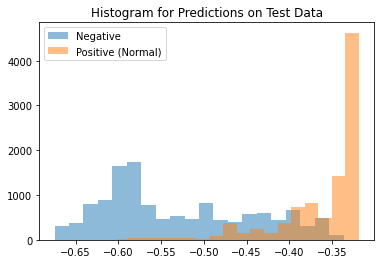

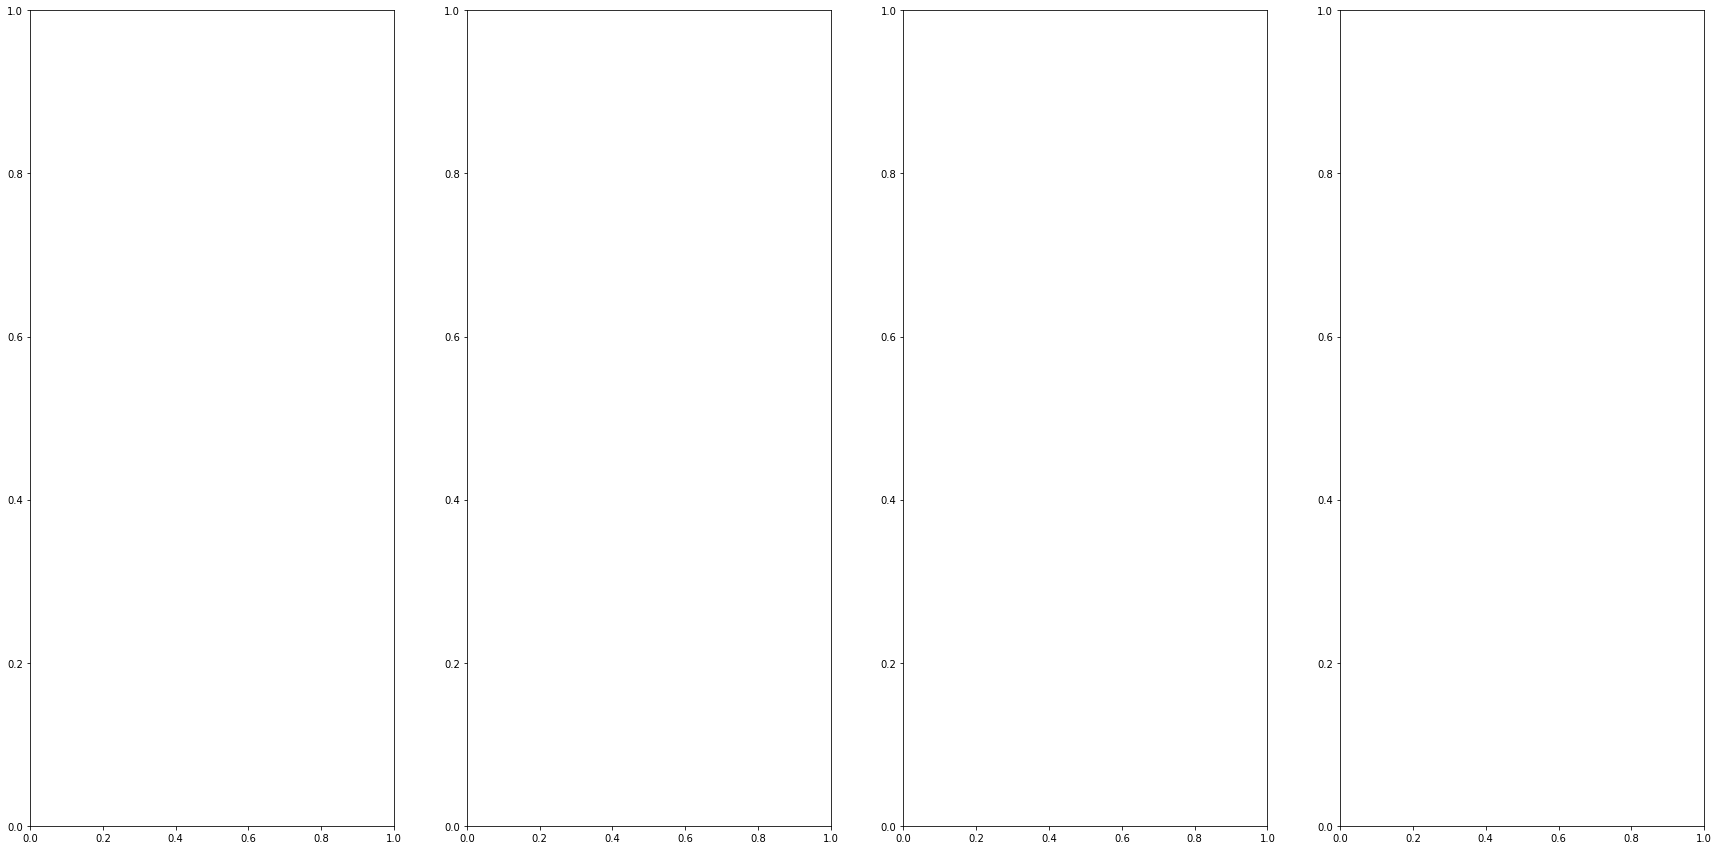

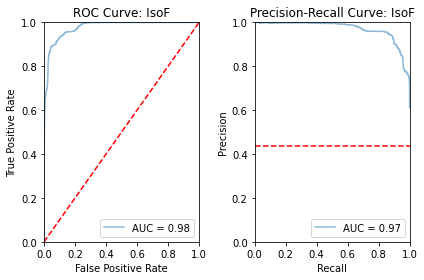

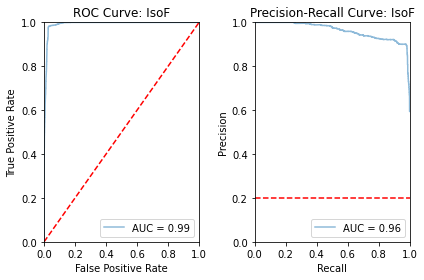

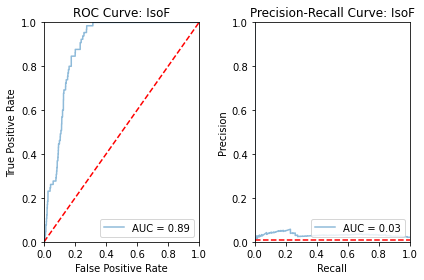

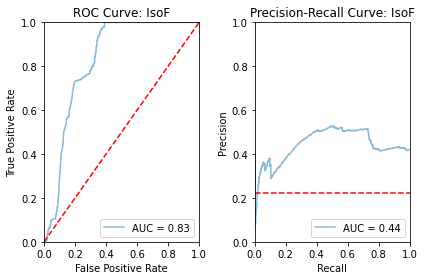

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


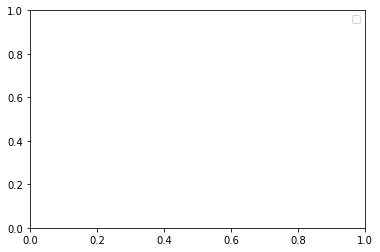

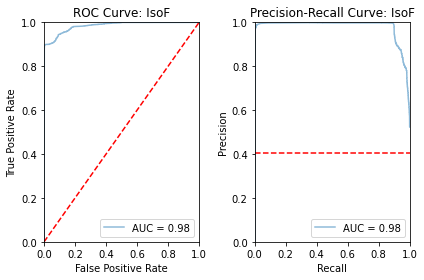

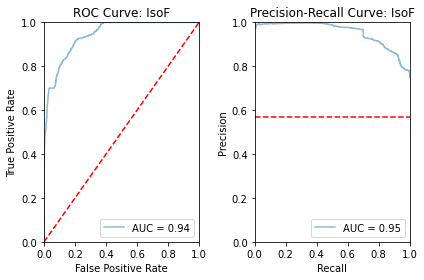

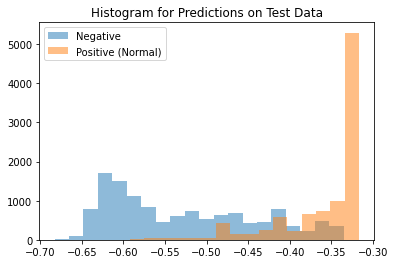

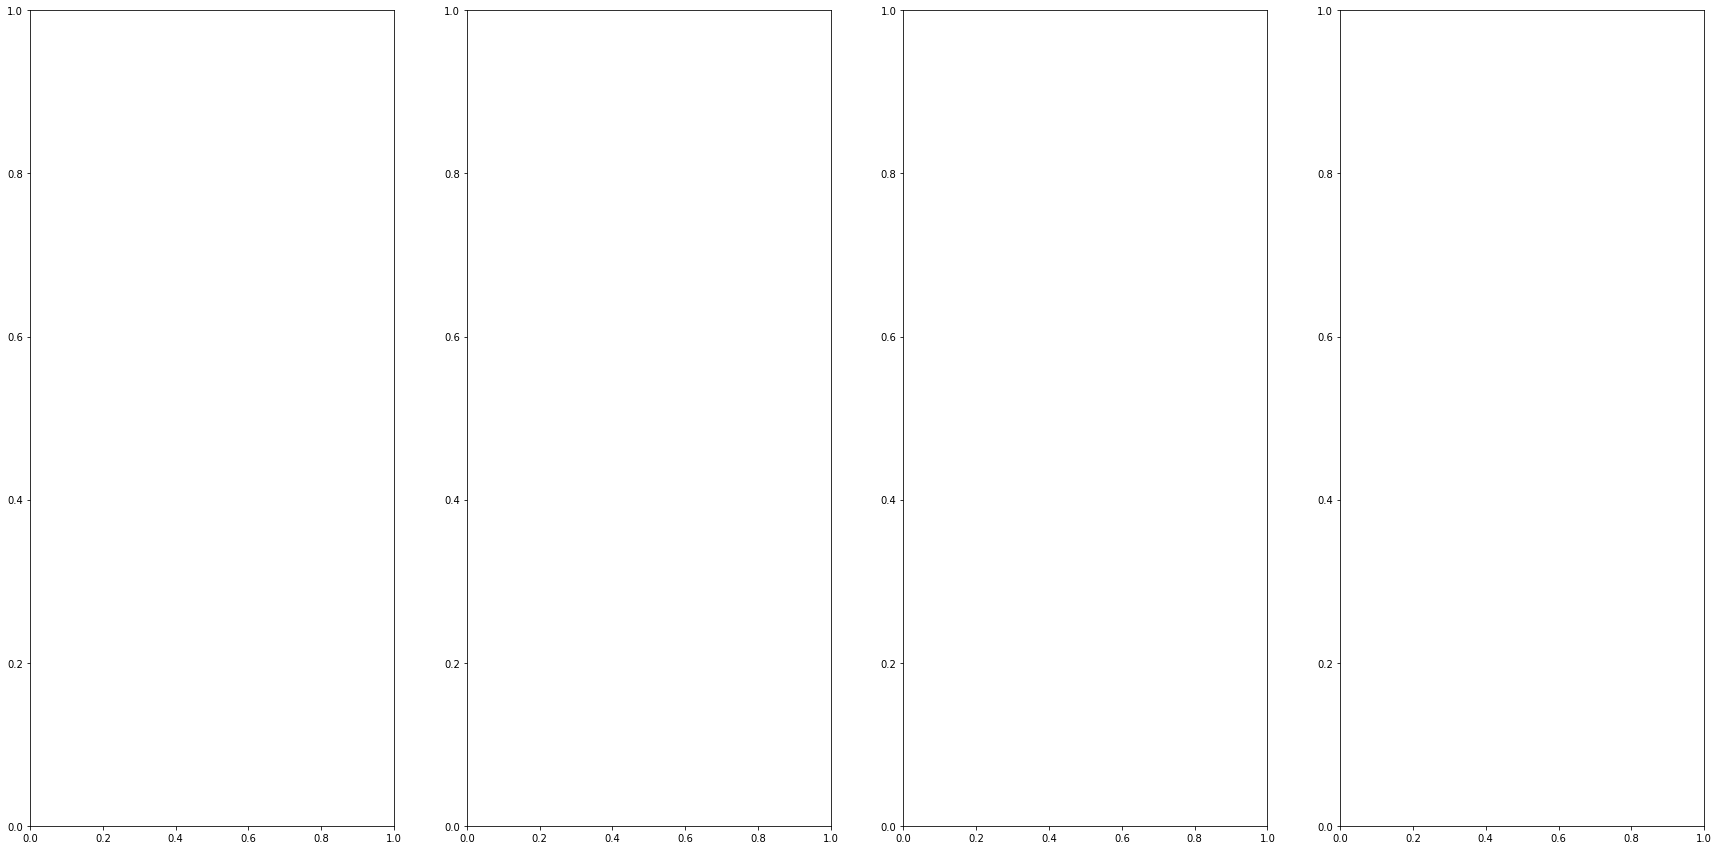

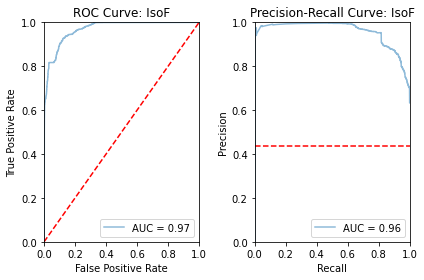

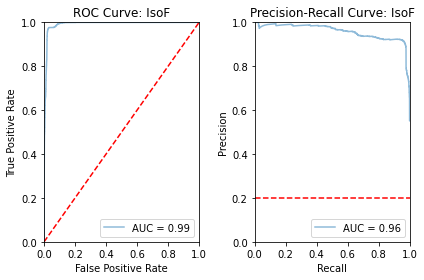

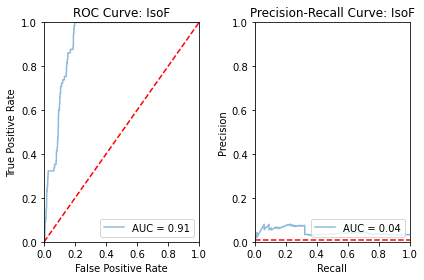

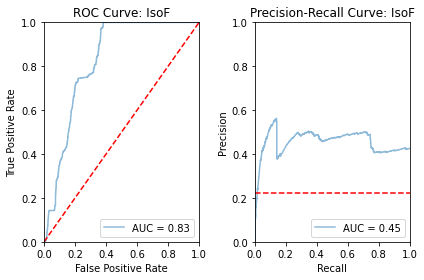

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


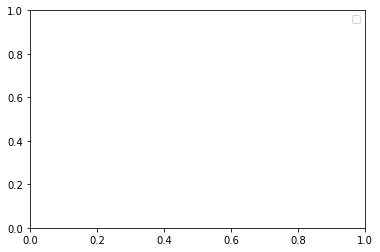

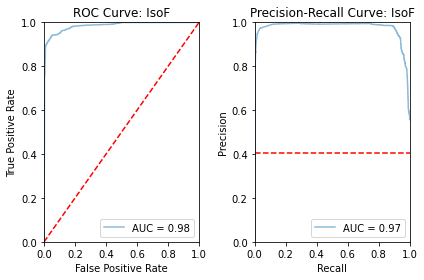

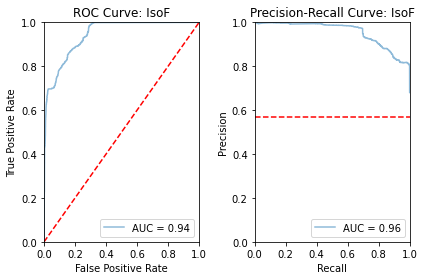

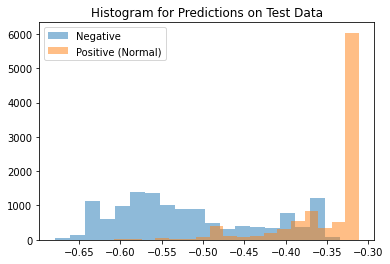

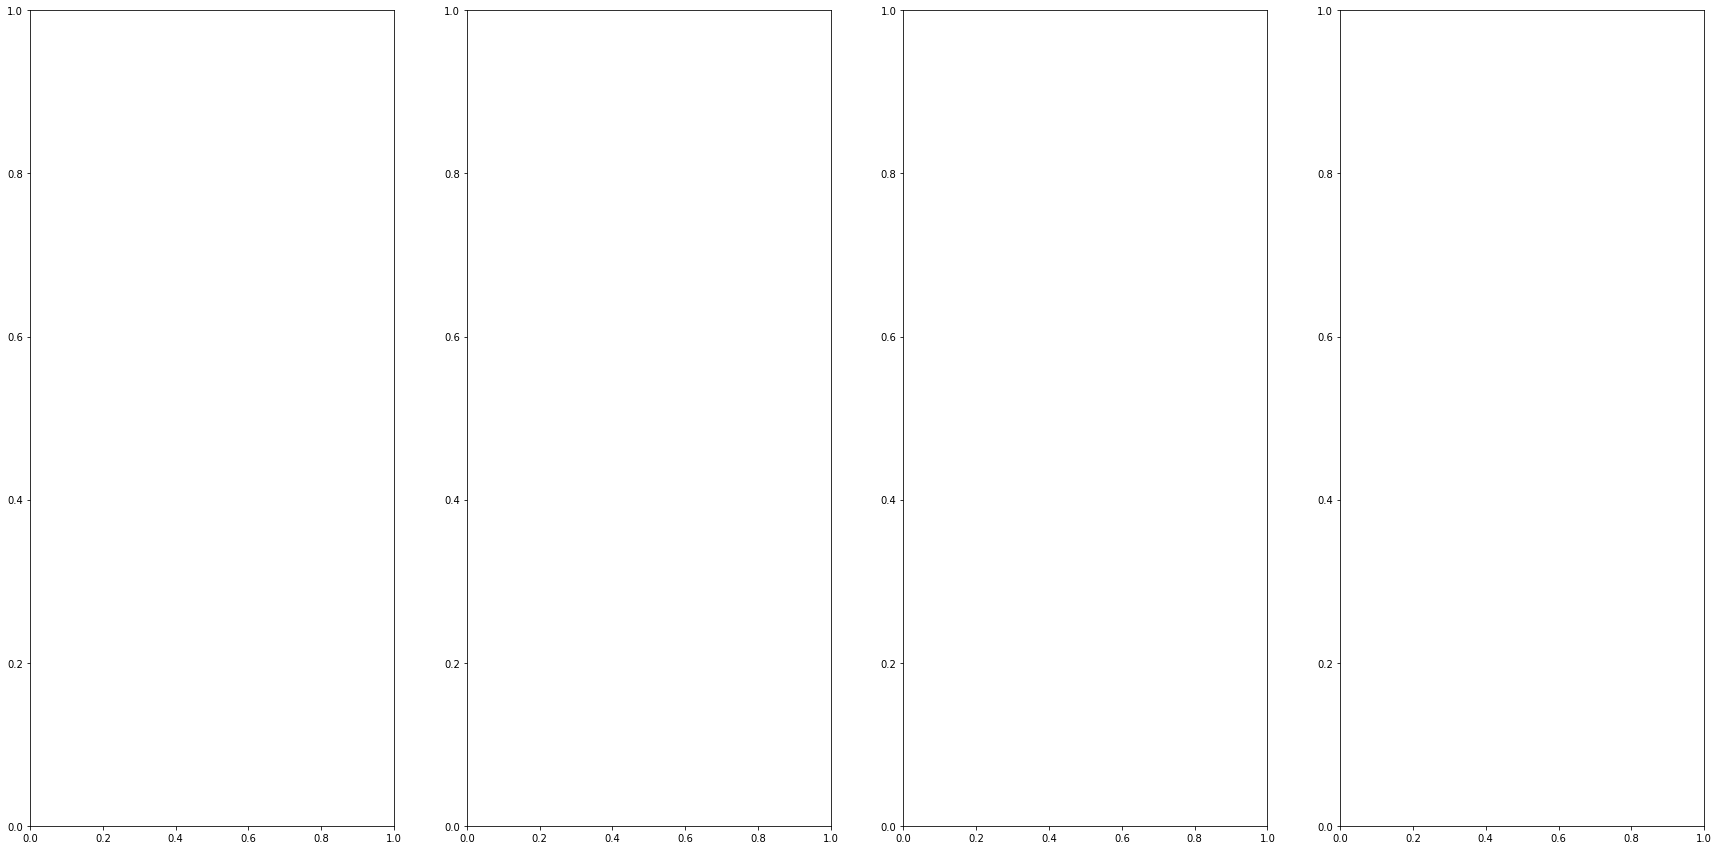

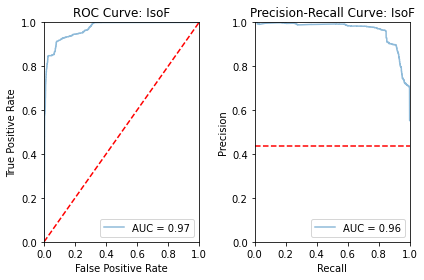

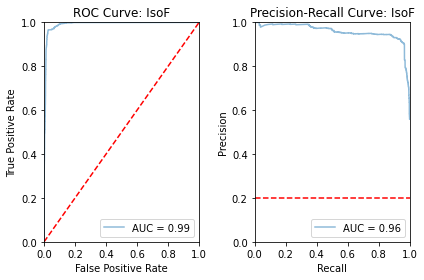

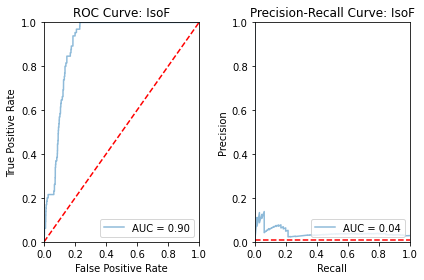

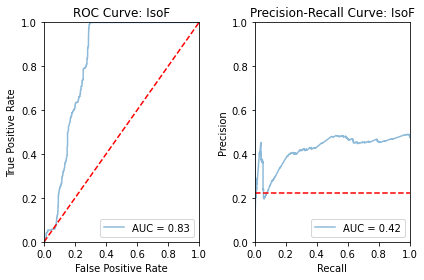

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


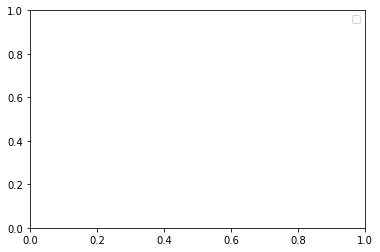

AUPR (Train): 0.9790789196357781+-0.003348154083681815
AUPR (Test): 0.9565368582856651+-0.001994905740015534


,0,1,2,AUPR Mean,AUPR Std
1,0.970147,0.958362,0.964513,0.964341,0.005895
2,0.963068,0.958585,0.958728,0.960127,0.002548
3,0.031967,0.044798,0.041243,0.039336,0.006625
4,0.439000,0.452579,0.422355,0.437978,0.015138


([0.9826682290154911, 0.9799587456963929, 0.9746097841954504],
 [0.9593041300918426, 0.9546776927511421, 0.9556287520140108],
 {0: [0.9701474001988334,
   0.9630678069419103,
   0.031966870351756195,
   0.4390004964166022],
  1: [0.958361798733186,
   0.9585852531556923,
   0.044797967595525276,
   0.45257859846647075],
  2: [0.9645129845225066,
   0.9587279245627042,
   0.04124261764068193,
   0.4223545769071653]})

In [17]:
model_name = "IsoF"
params_dict = {
    "n_estimators": [50, 100],
          "contamination": [0.0, "auto"],
          "max_samples": ["auto", 0.9, 1.],
          "max_features": [1.0]
         }

best_params = cross_validate_unsupervised(IsolationForest, params_dict, model_name, seed=0)
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = IsolationForest(random_state=N, **best_params)
    
    model.fit(X[y==1])
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

{'n_estimators': 50, 'contamination': 'auto', 'max_samples': 'auto', 'max_features': 1.0}


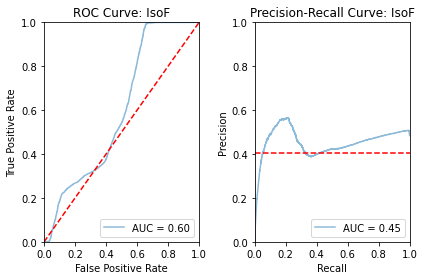

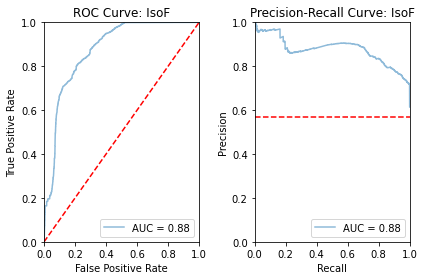

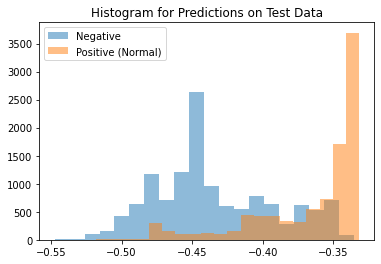

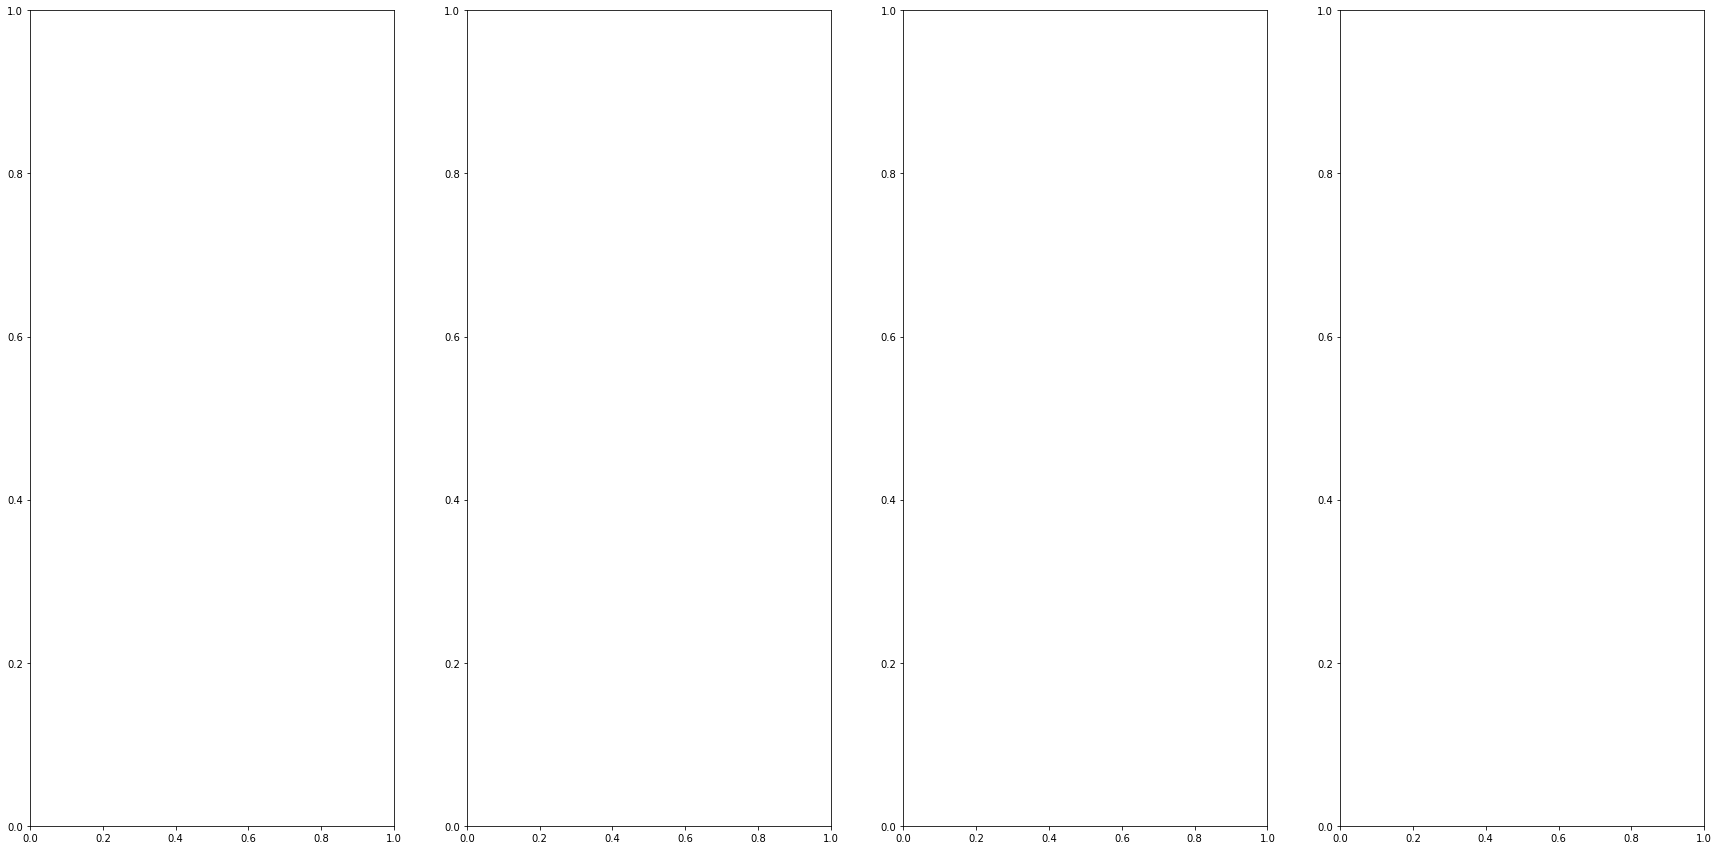

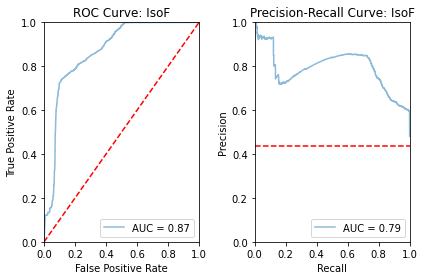

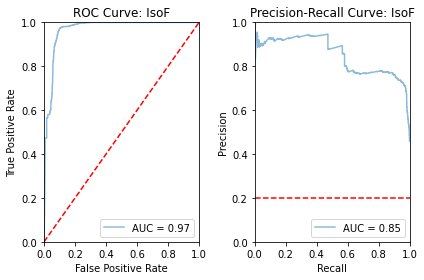

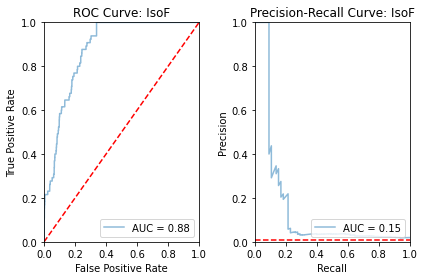

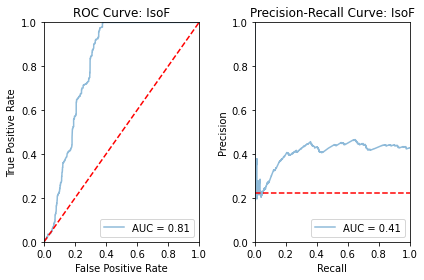

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


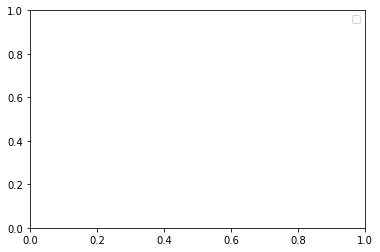

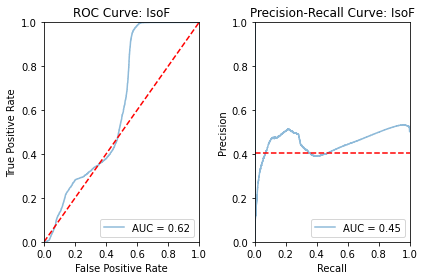

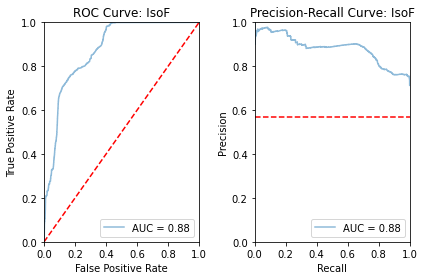

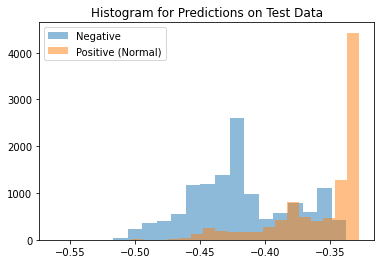

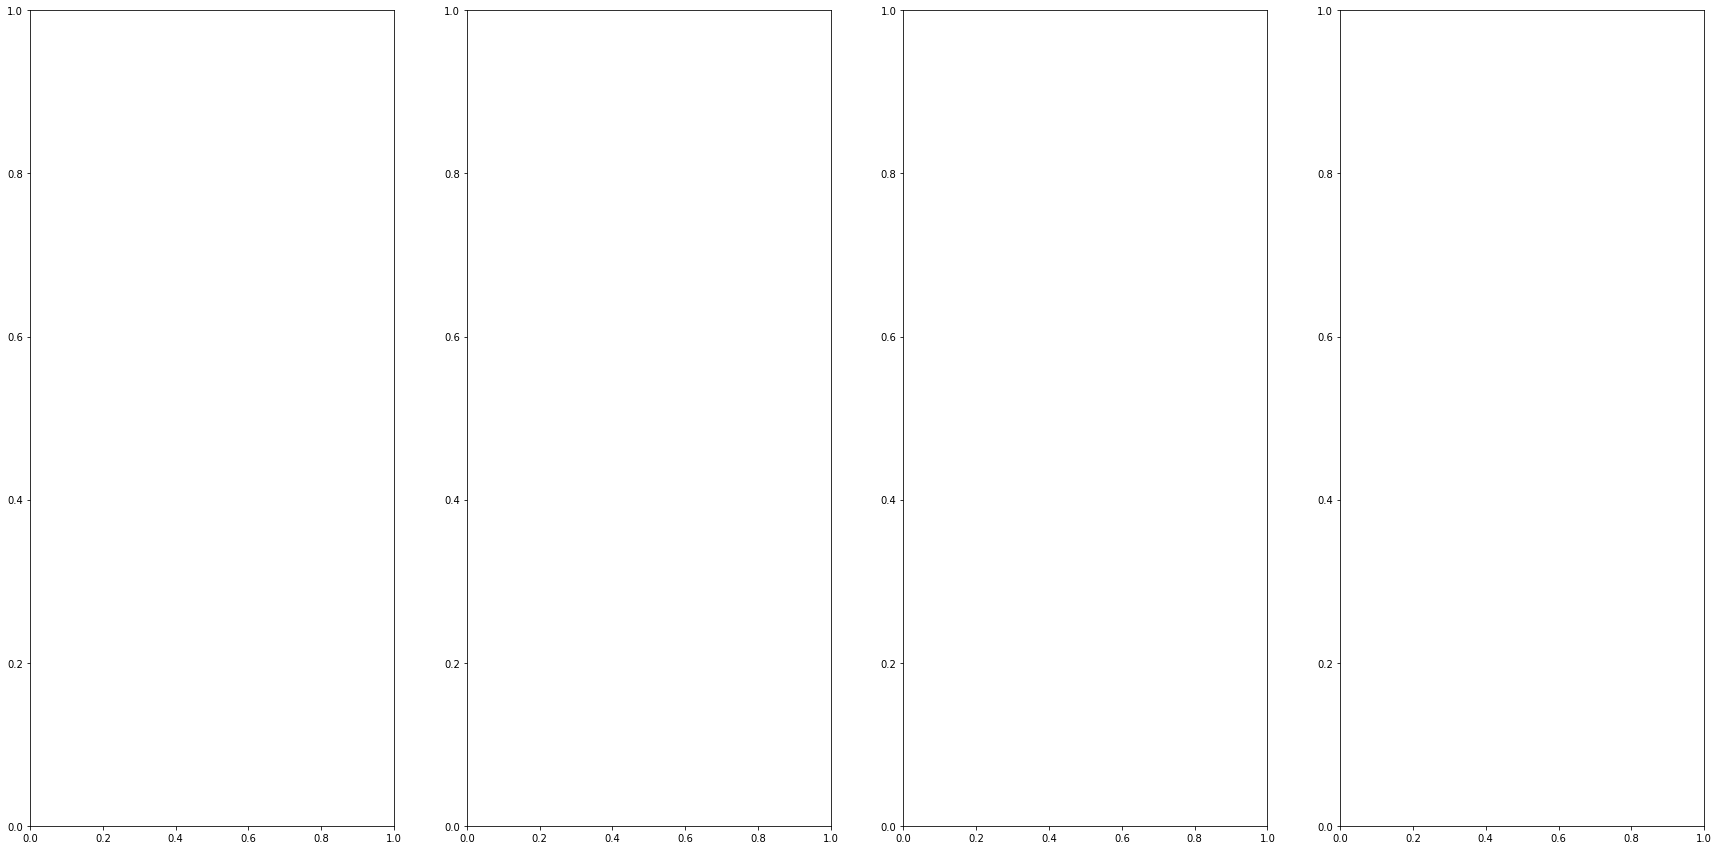

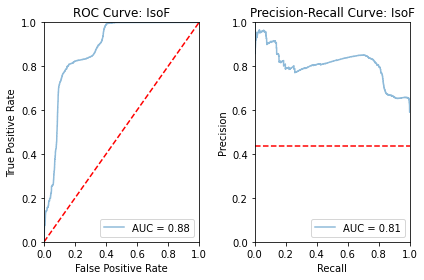

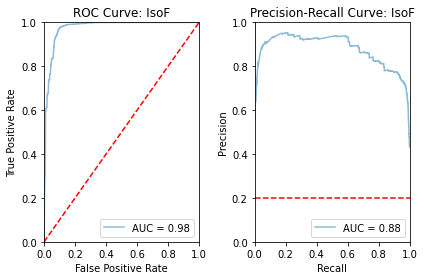

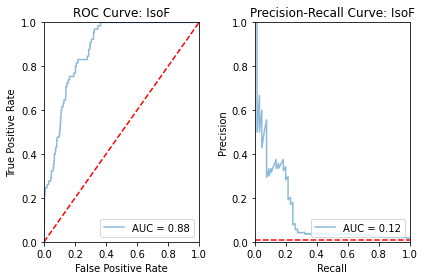

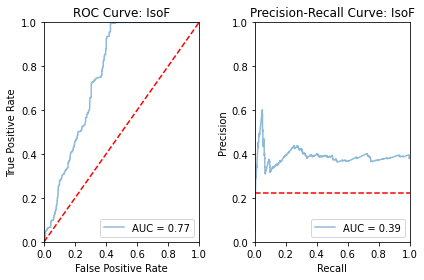

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


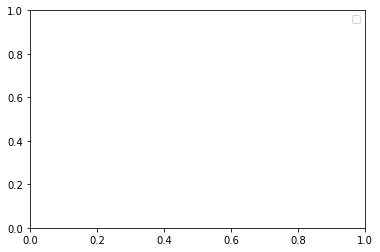

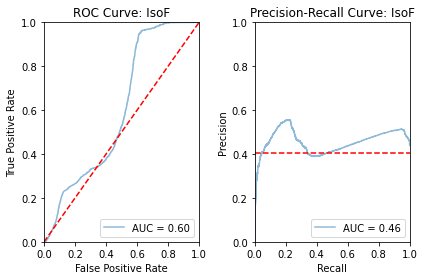

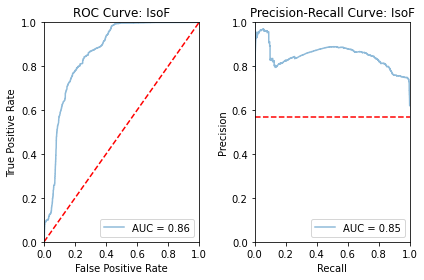

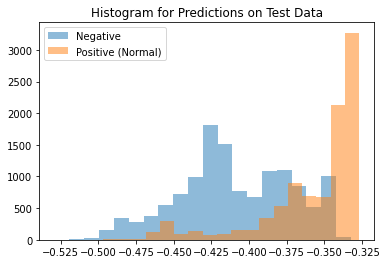

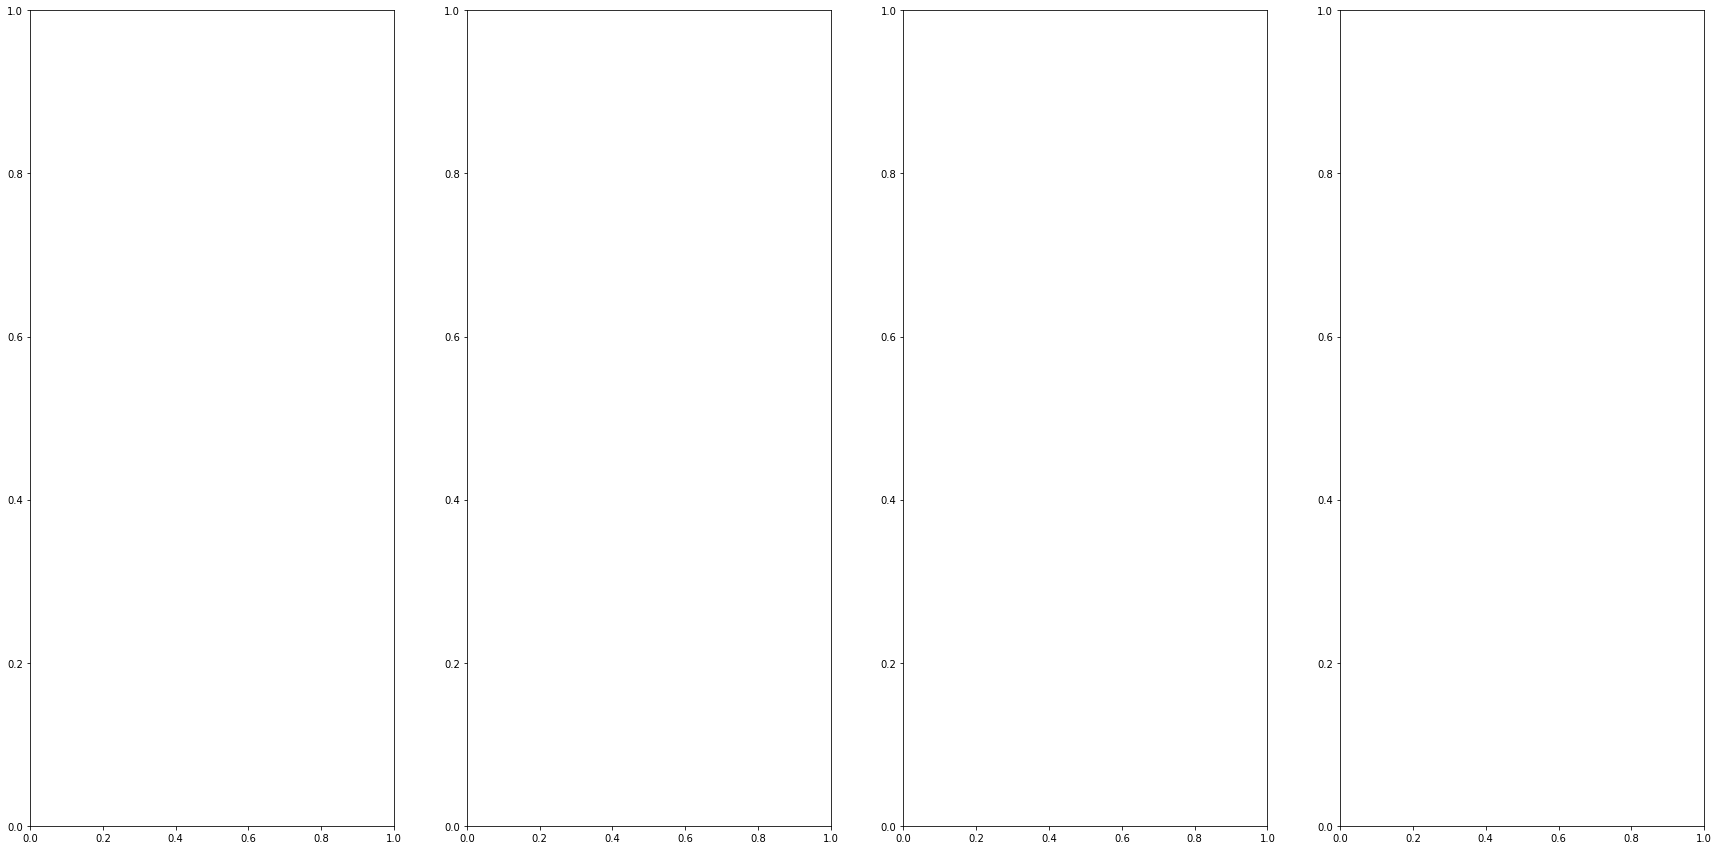

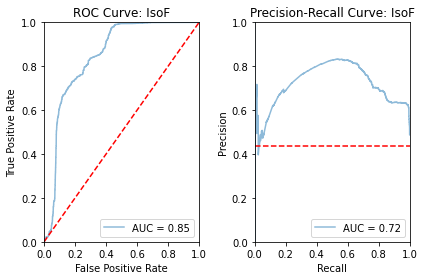

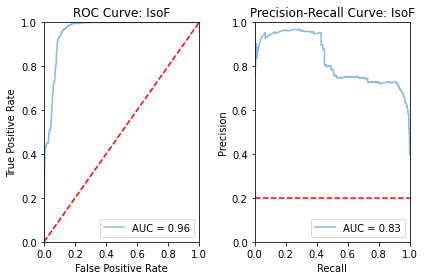

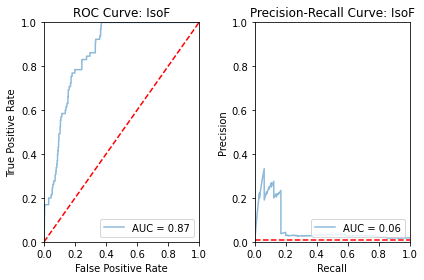

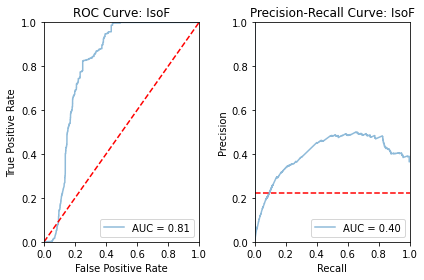

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


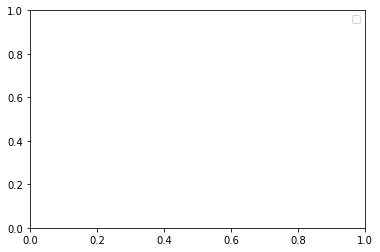

AUPR (Train): 0.45467335323599506+-0.0009427780417930774
AUPR (Test): 0.8693491483967858+-0.014120375652915181


,0,1,2,AUPR Mean,AUPR Std
1,0.791164,0.806908,0.715674,0.771249,0.048768
2,0.851071,0.876904,0.828373,0.852116,0.024282
3,0.151022,0.123789,0.058932,0.111248,0.047309
4,0.407493,0.387398,0.397034,0.397308,0.010050


([0.454235002851943, 0.4538020549713374, 0.4559830018847049],
 [0.8765230878848228, 0.8819015236529724, 0.8496228336525621],
 {0: [0.791164024133618,
   0.8510707688992215,
   0.15102223888504543,
   0.407492569736754],
  1: [0.8069084088491786,
   0.8769041513131456,
   0.12378879545003728,
   0.3873984064361111],
  2: [0.7156744963425171,
   0.8283734124400753,
   0.05893185007663453,
   0.3970337122737577]})

In [18]:
model_name = "IsoF"
# params_dict = {
#     "n_estimators": [50, 100],
#           "contamination": ["auto", 0.25],
#           "max_samples": ["auto", 0.9, 1.],
#           "max_features": [1.0]
#          }

# best_params = cross_validate_unsupervised(IsolationForest, params_dict, model_name, seed=0)
best_params = {
    "n_estimators": 50,
          "contamination": "auto",
          "max_samples": "auto",
          "max_features": 1.0
         }
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = IsolationForest(random_state=N, **best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Get Min CV Score
Train


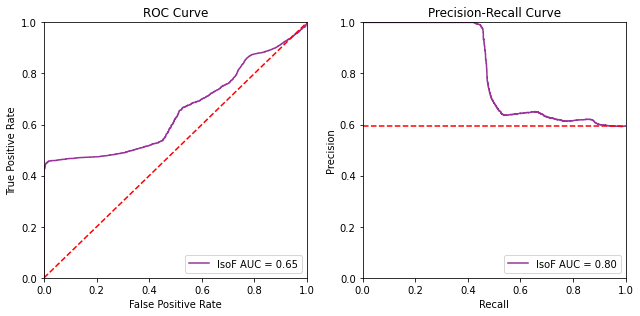

Test


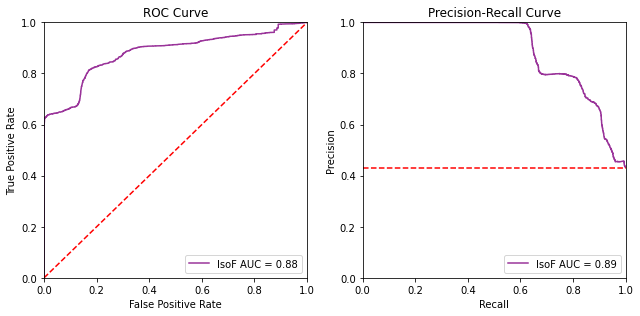

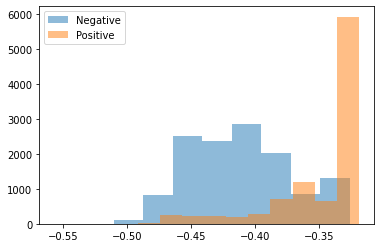

{'n_estimators': 50, 'contamination': 'auto', 'max_samples': 'auto', 'max_features': 1.0}


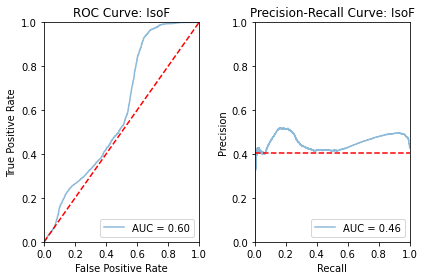

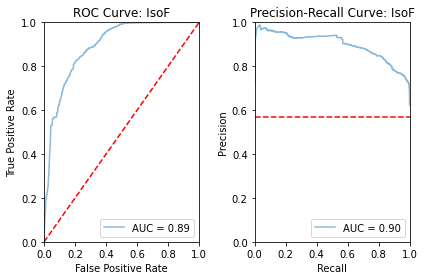

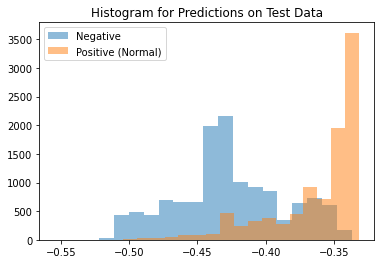

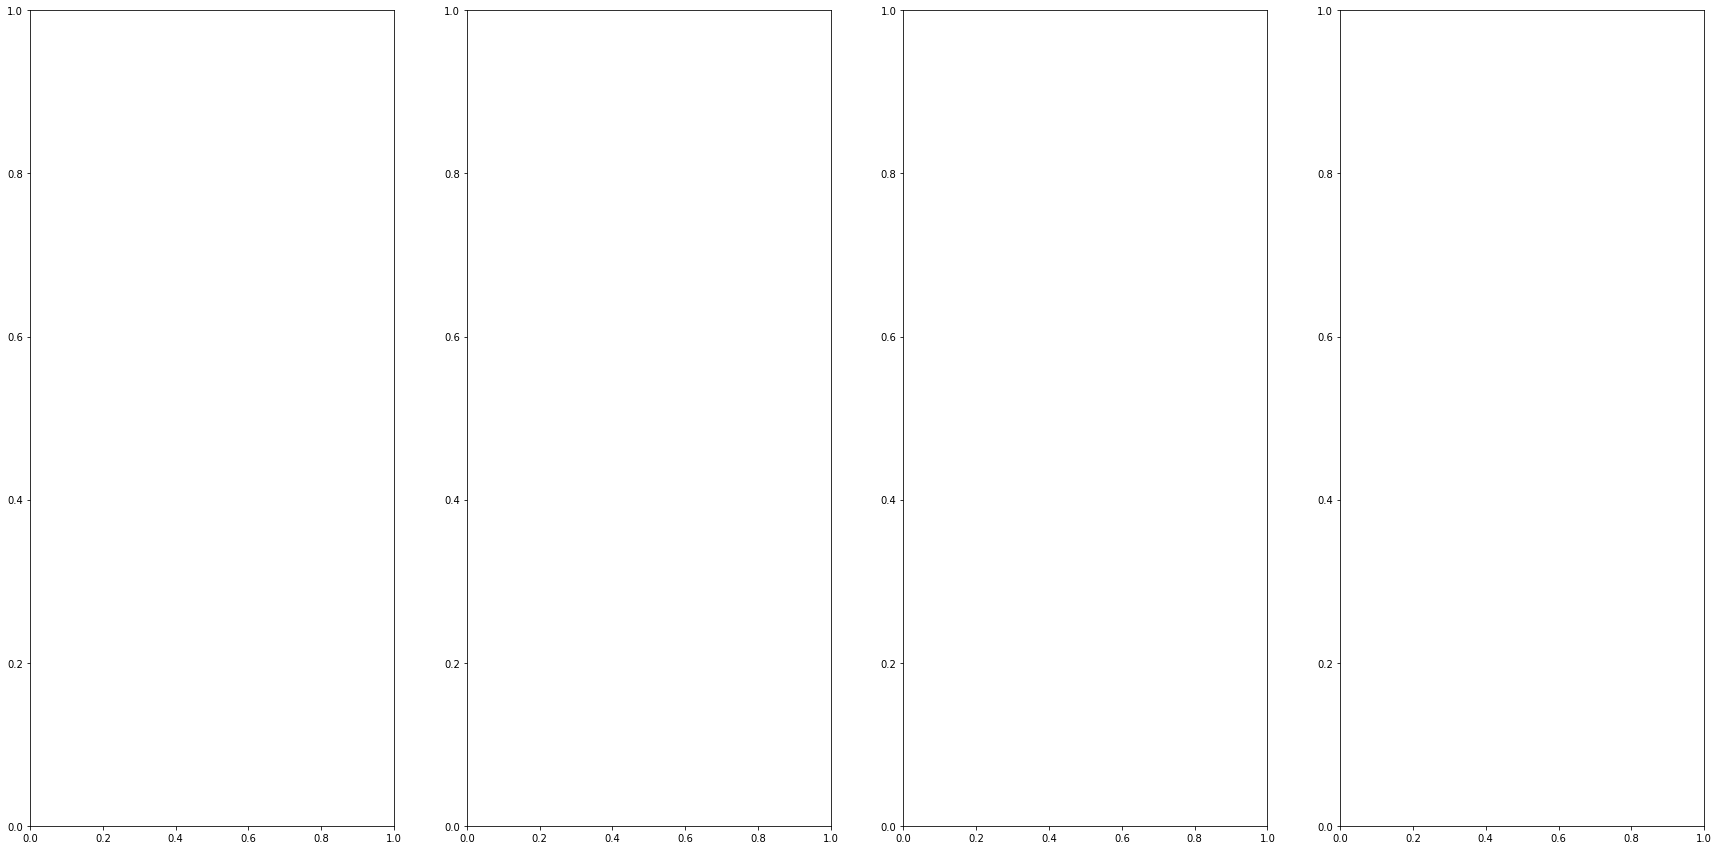

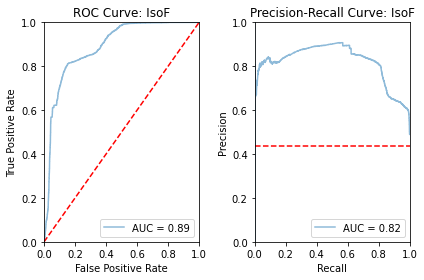

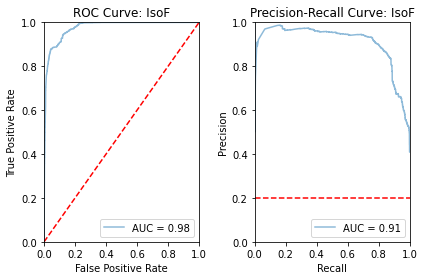

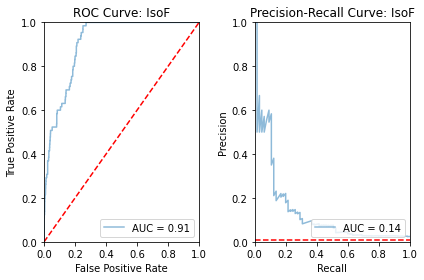

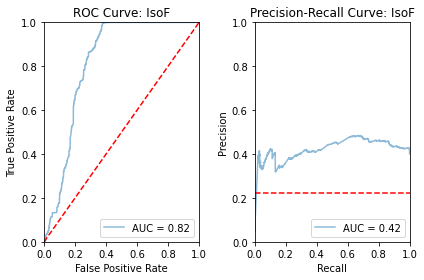

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


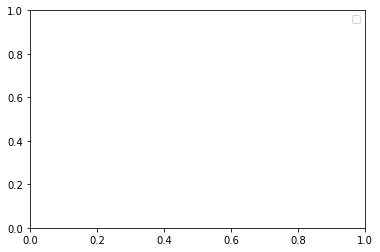

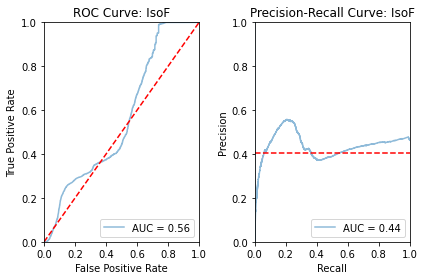

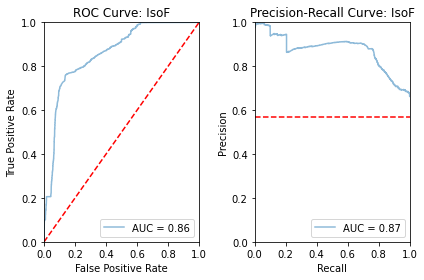

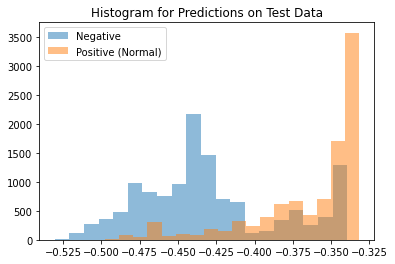

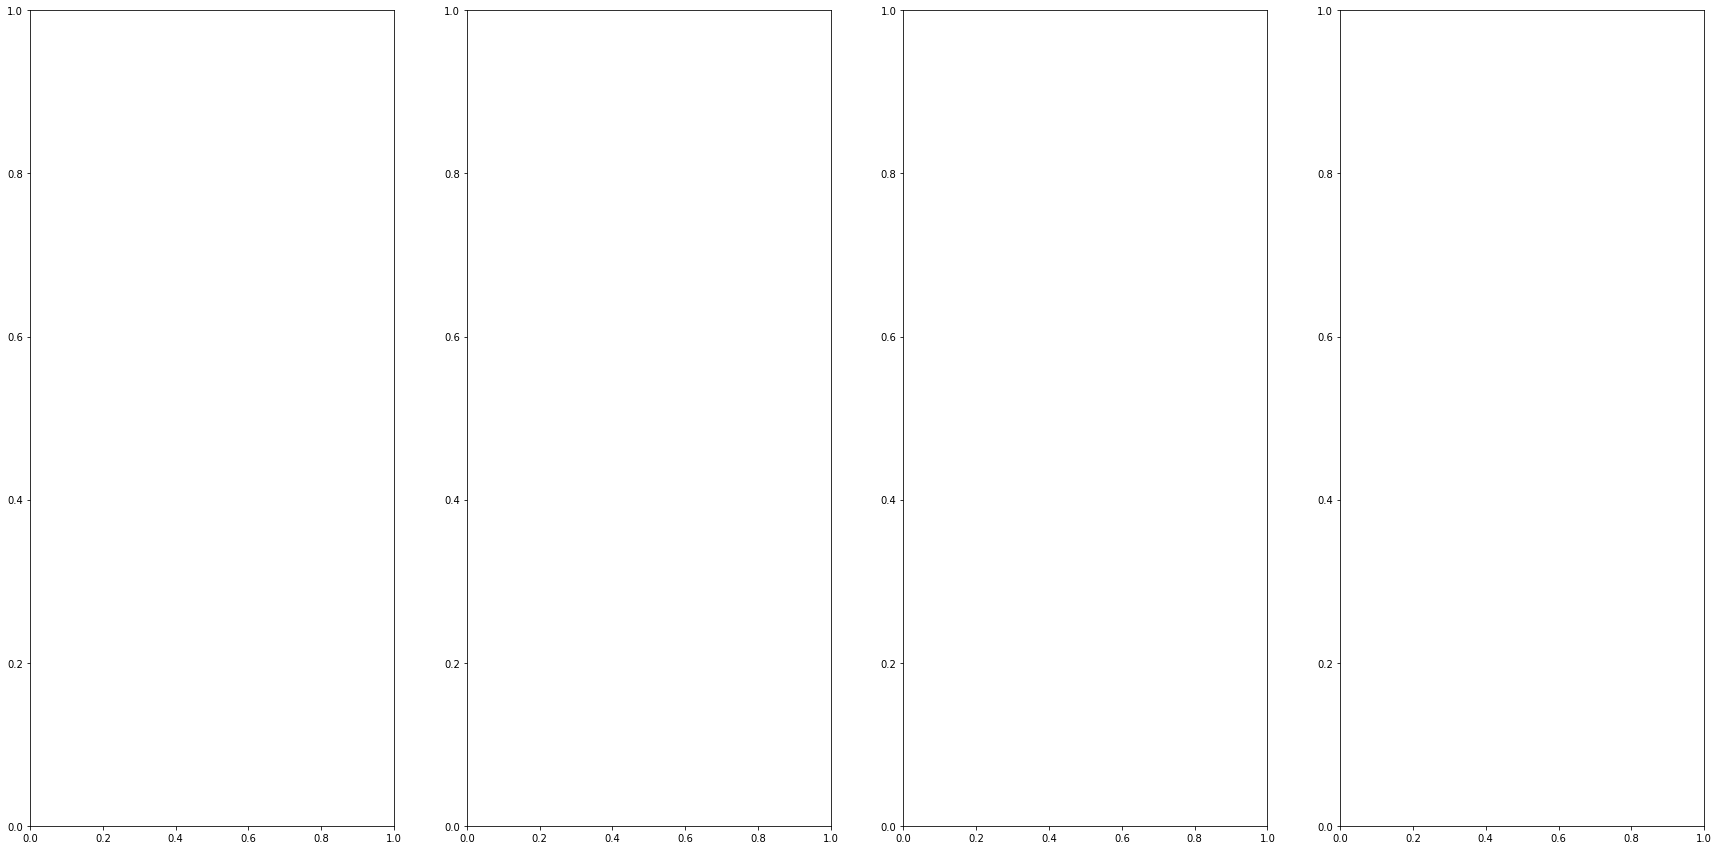

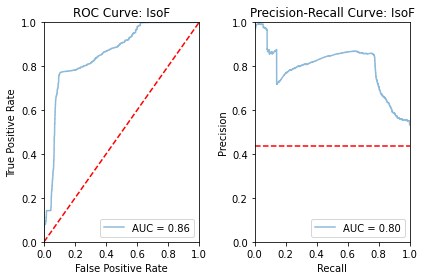

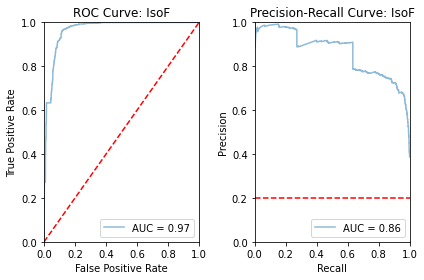

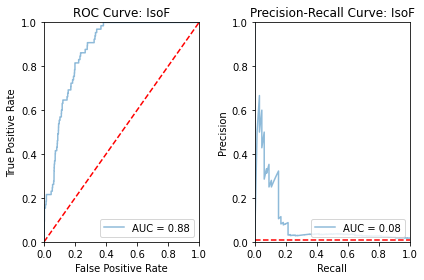

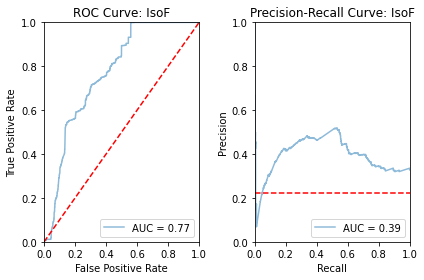

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


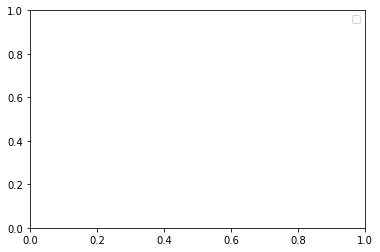

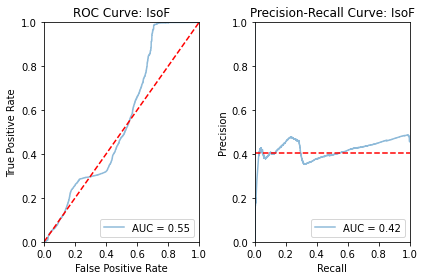

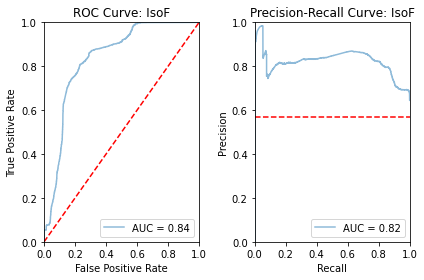

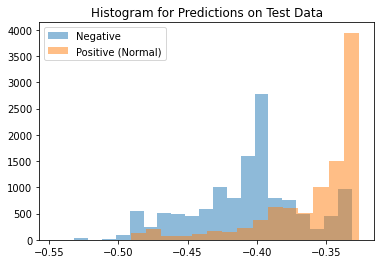

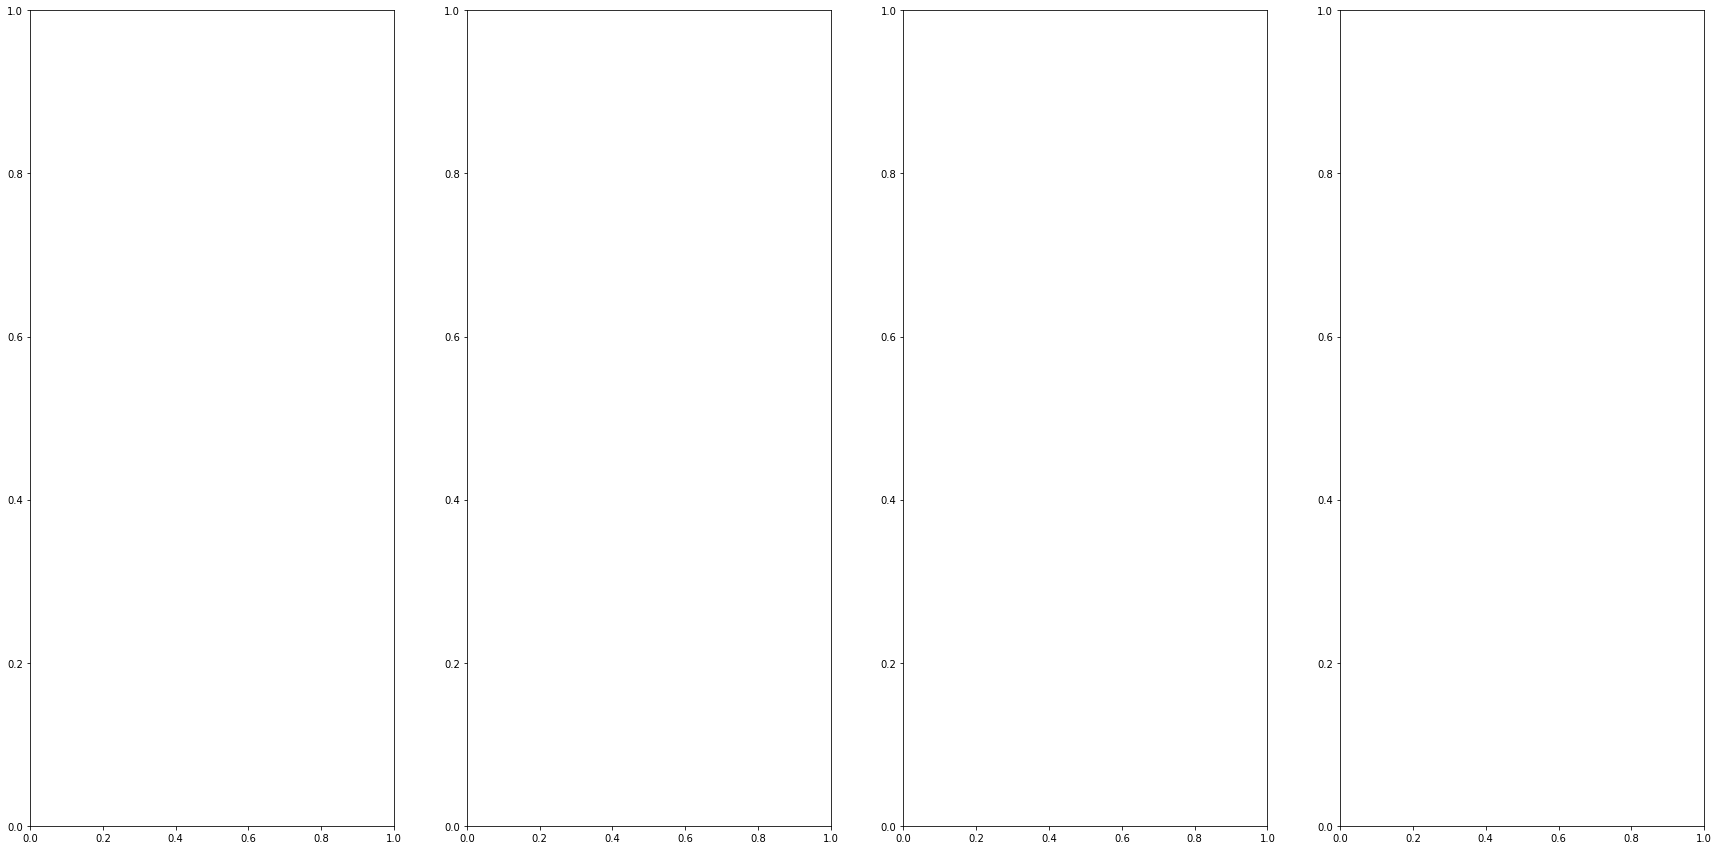

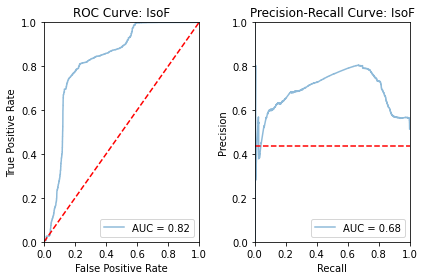

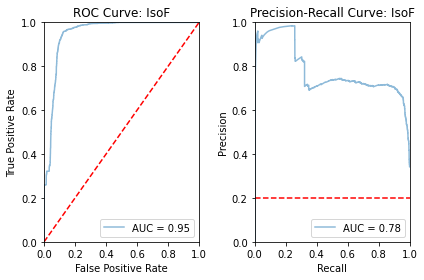

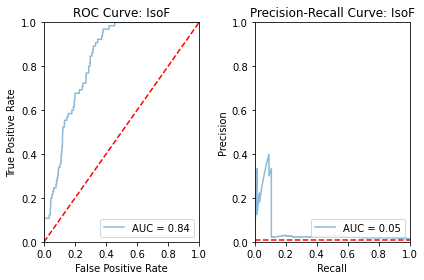

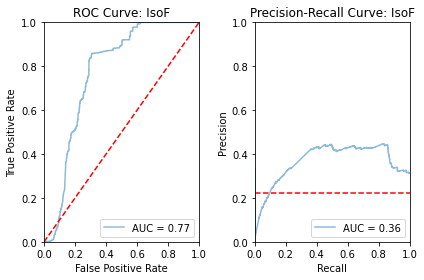

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


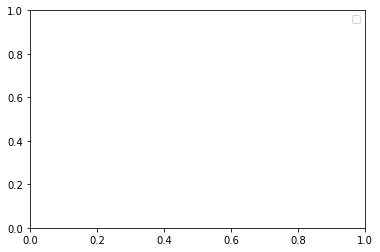

AUPR (Train): 0.438014401809816+-0.013792460421694437
AUPR (Test): 0.8653978763554105+-0.031437086952938564


,0,1,2,AUPR Mean,AUPR Std
1,0.818083,0.795586,0.681940,0.765203,0.072980
2,0.908187,0.863167,0.778656,0.850003,0.065761
3,0.135192,0.083846,0.047959,0.088999,0.043844
4,0.421372,0.391698,0.362725,0.391932,0.029325


([0.45517502968806534, 0.43746419277935855, 0.4214039829620242],
 [0.8983455156296514, 0.8747750809498523, 0.8230730324867281],
 {0: [0.8180830420974055,
   0.9081869143770693,
   0.13519151258359244,
   0.4213724071155063],
  1: [0.7955857532108094,
   0.8631673513051391,
   0.0838462557237371,
   0.3916975416702606],
  2: [0.6819403300025271,
   0.7786559072786637,
   0.0479585287594344,
   0.3627247483700824]})

In [19]:
model_name = "IsoF"
params_dict = {
    "n_estimators": [50, 100],
          "contamination": ["auto", 1 - np.sum(y)/len(y)],
          "max_samples": ["auto", 0.9, 1.],
          "max_features": [1.0]
         }
# params_dict = {
#     "n_estimators": [50],
#           "contamination": ["auto"],
#           "max_samples": ["auto"],
#           "max_features": [1.0]
#          }

best_params = cross_validate_unsupervised(IsolationForest, params_dict, model_name, seed=0)
# best_params = {
#     "n_estimators": 50,
#           "contamination": "auto",
#           "max_samples": "auto",
#           "max_features": 1.0
#          }
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = IsolationForest(random_state=N, **best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

{'n_neighbors': 5, 'contamination': 'auto', 'leaf_size': 30, 'novelty': True}


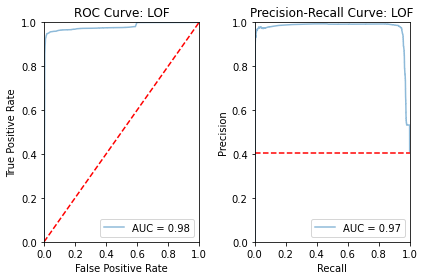

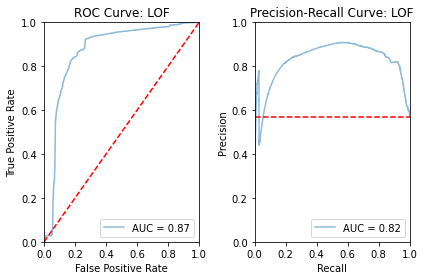

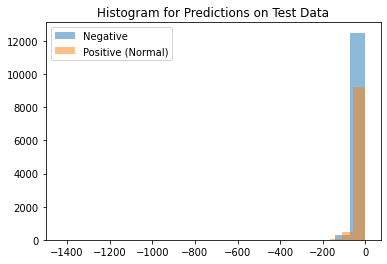

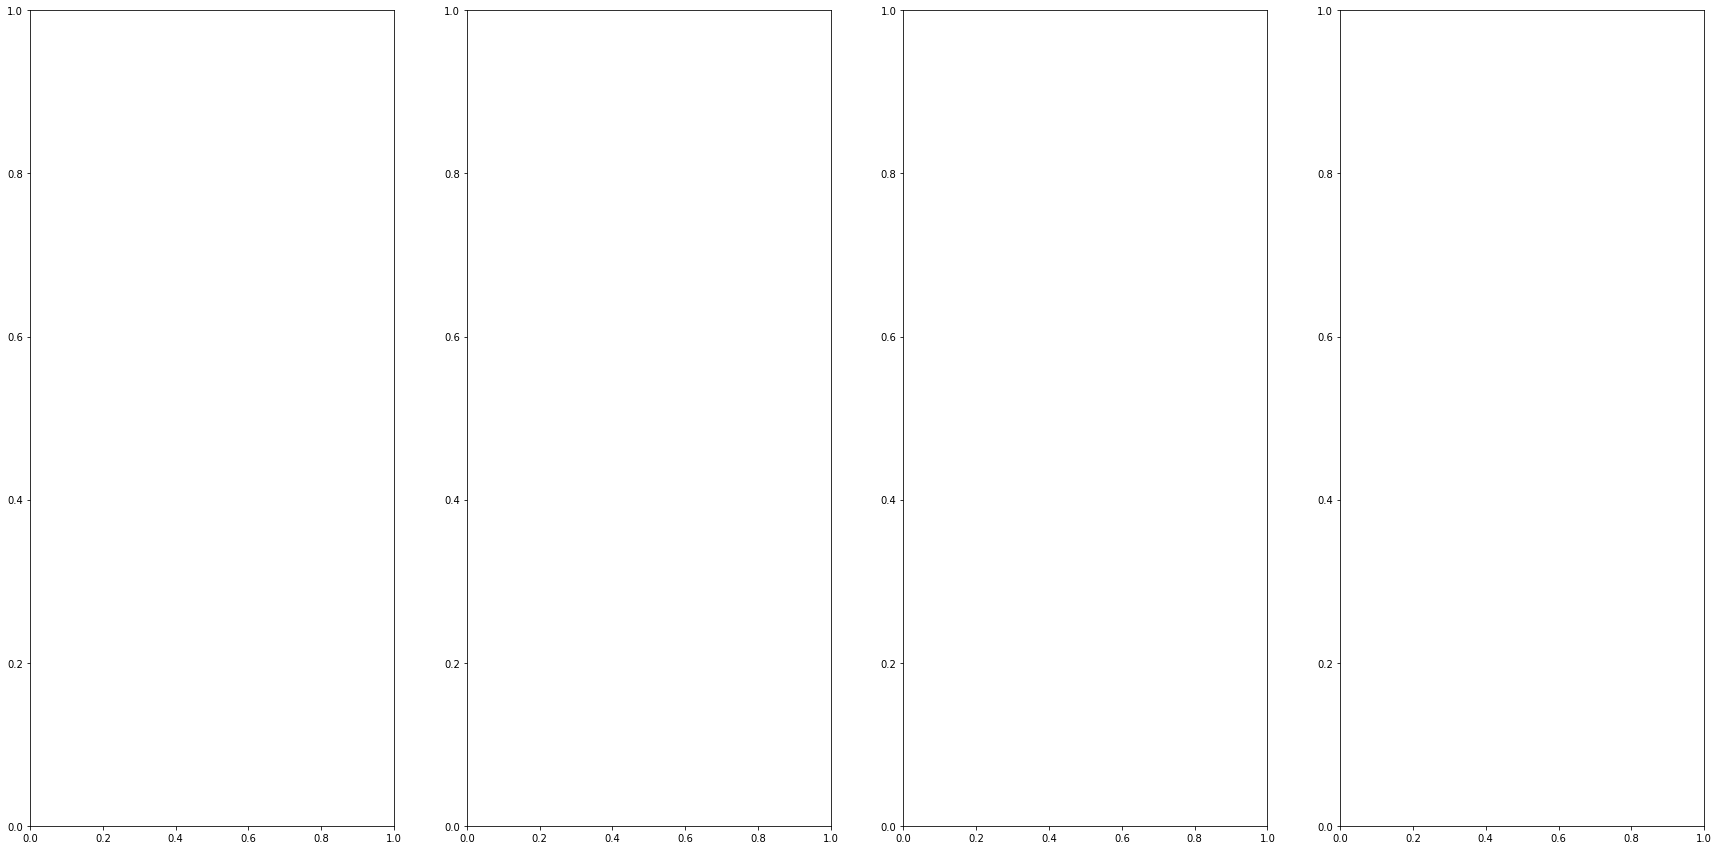

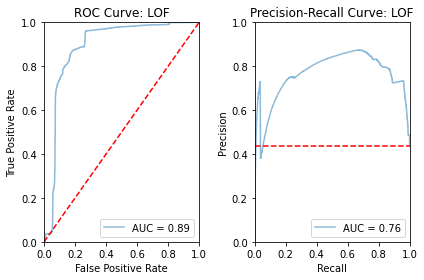

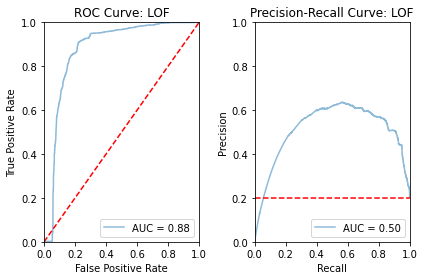

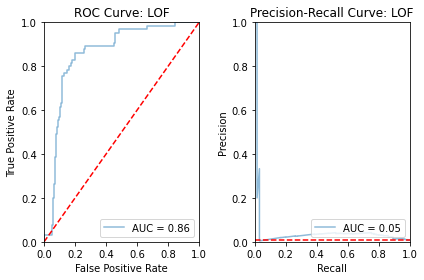

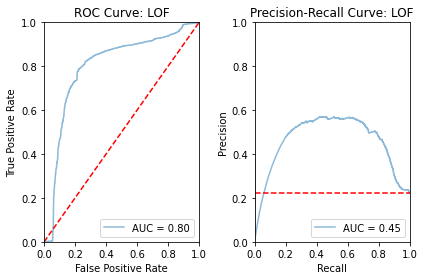

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


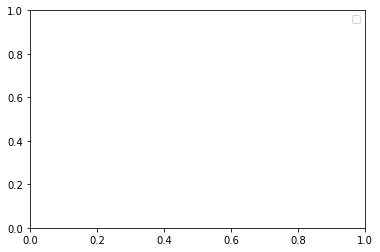

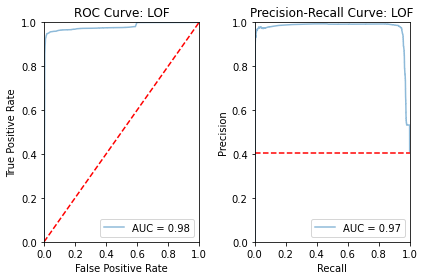

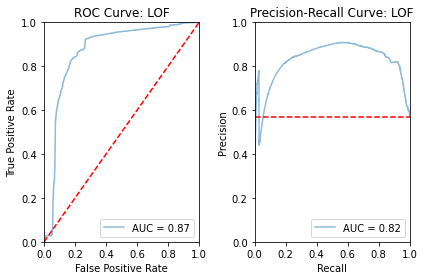

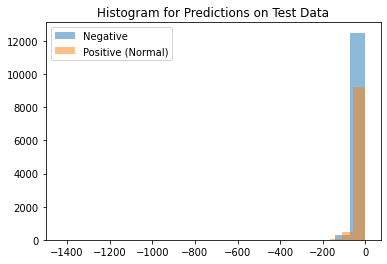

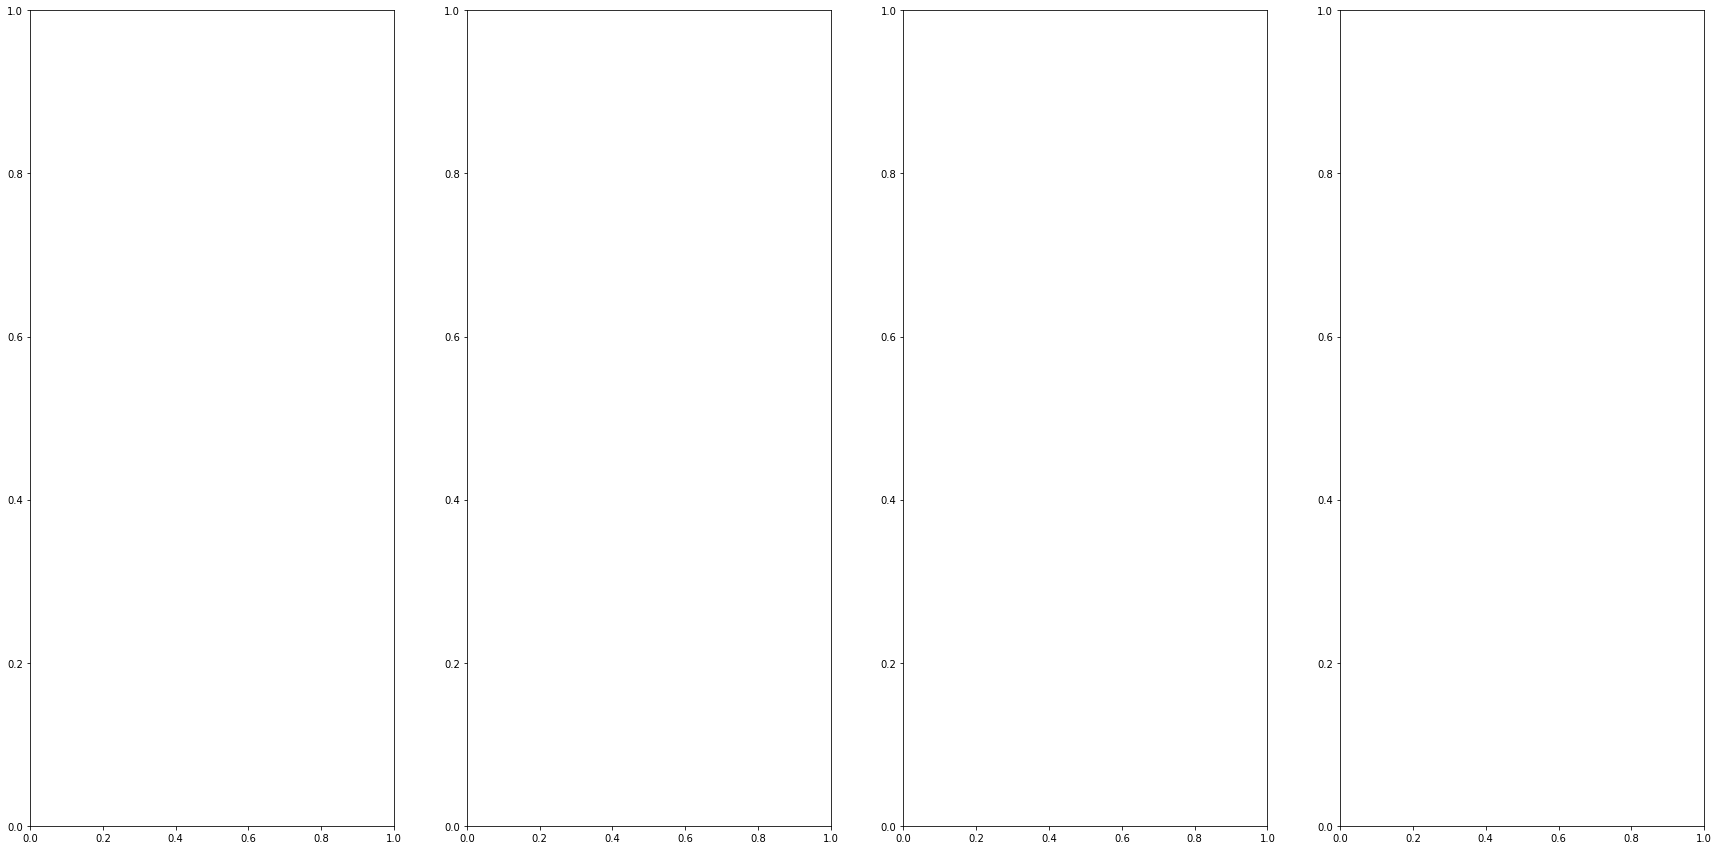

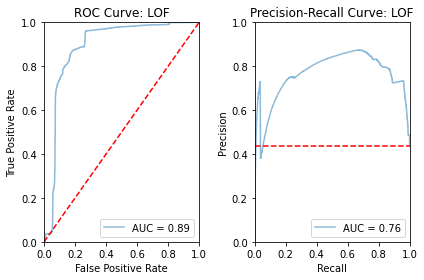

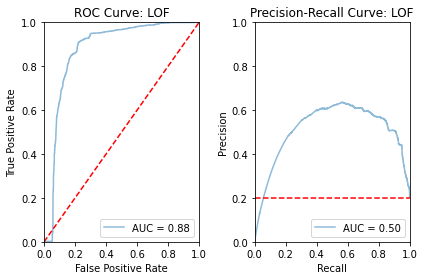

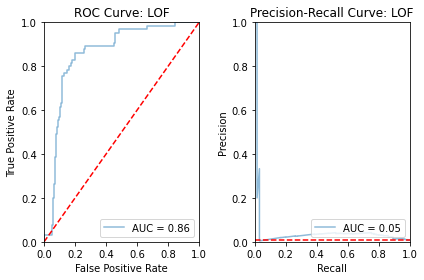

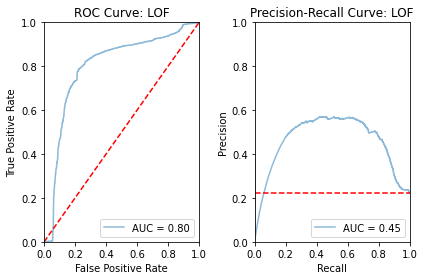

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


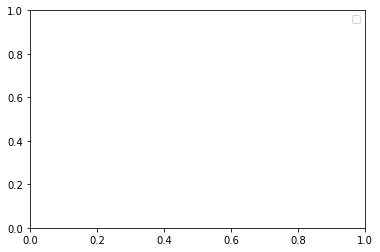

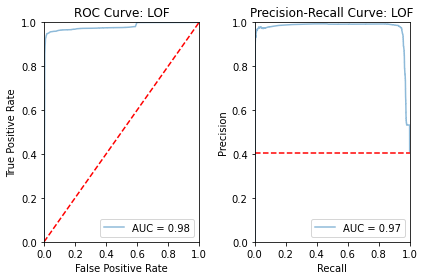

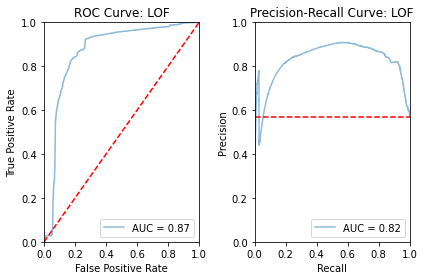

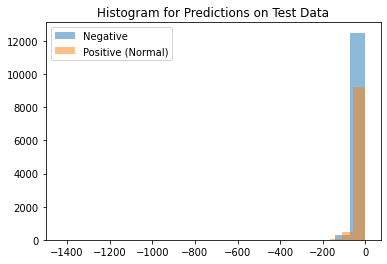

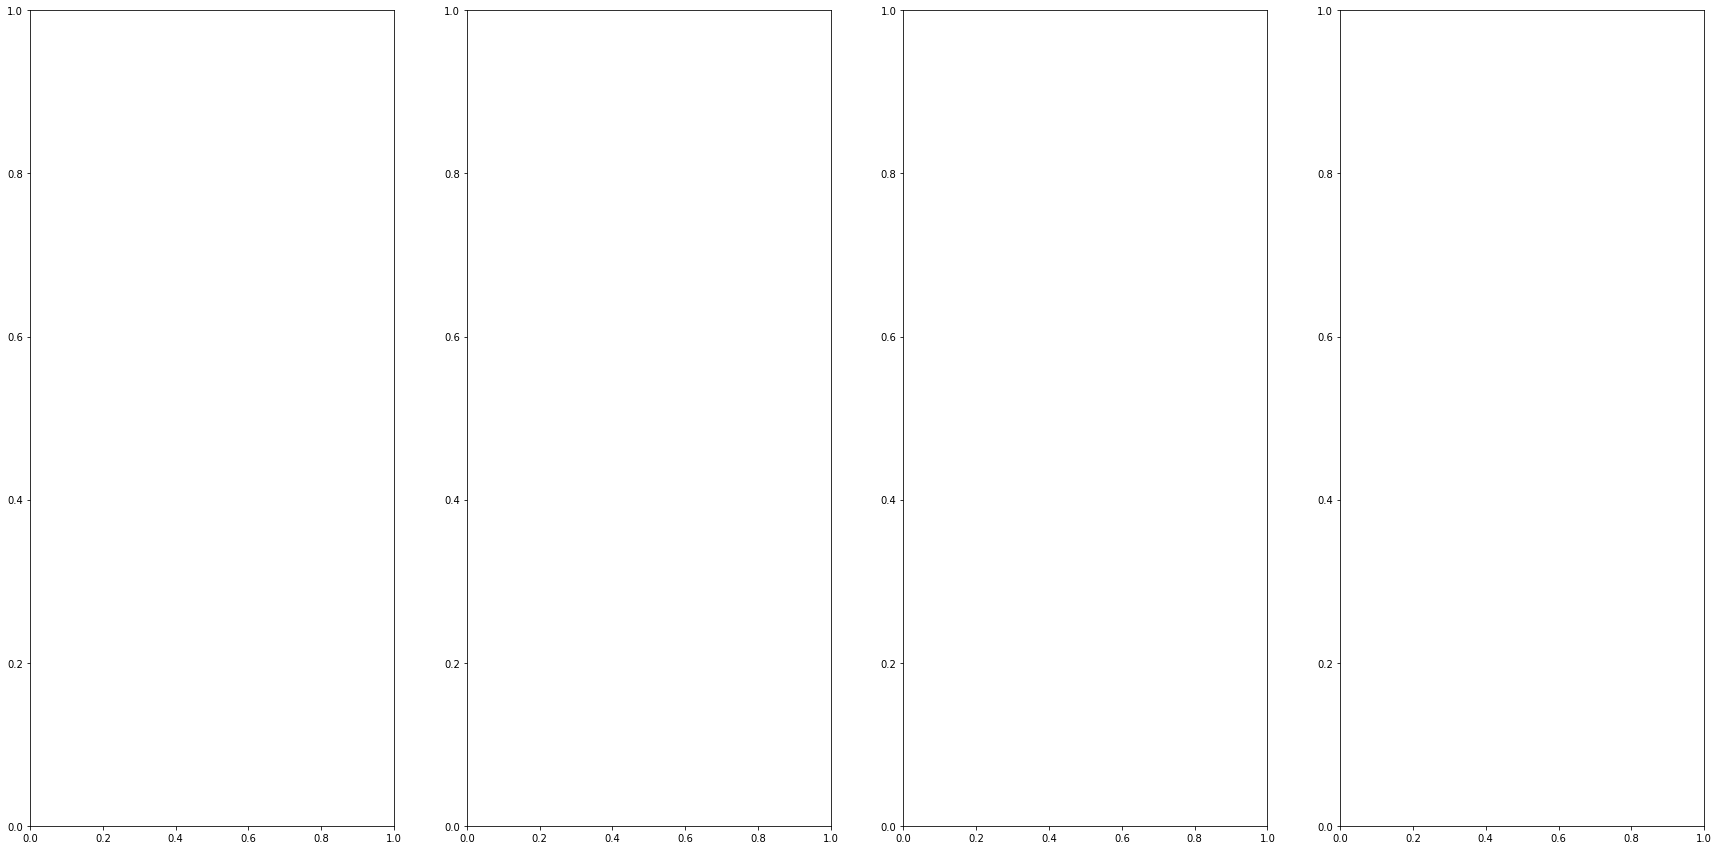

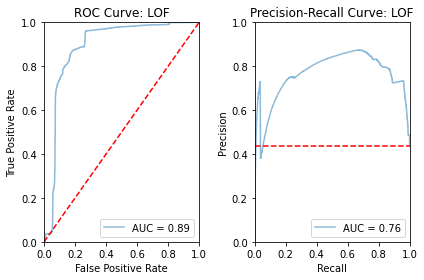

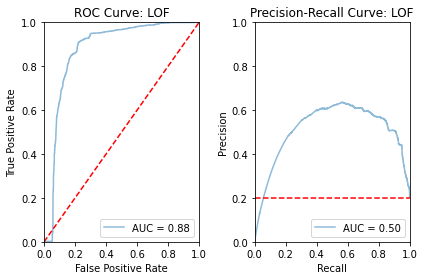

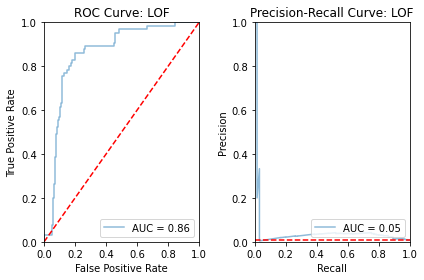

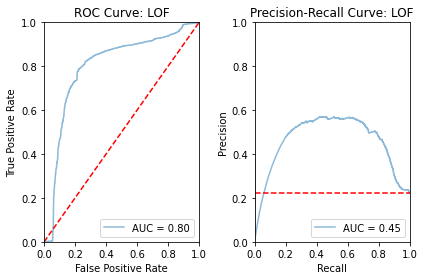

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


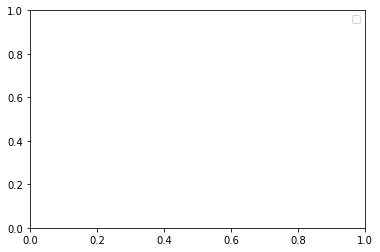

AUPR (Train): 0.9735745787722876+-0.0
AUPR (Test): 0.823648929967444+-0.0


,0,1,2,AUPR Mean,AUPR Std
1,0.758786,0.758786,0.758786,0.758786,0.000000e+00
2,0.501287,0.501287,0.501287,0.501287,0.000000e+00
3,0.046297,0.046297,0.046297,0.046297,8.498375e-18
4,0.451314,0.451314,0.451314,0.451314,0.000000e+00


([0.9735745787722876, 0.9735745787722876, 0.9735745787722876],
 [0.823648929967444, 0.823648929967444, 0.823648929967444],
 {0: [0.7587860198117684,
   0.501287190566759,
   0.04629664058804421,
   0.45131356620210467],
  1: [0.7587860198117684,
   0.501287190566759,
   0.04629664058804421,
   0.45131356620210467],
  2: [0.7587860198117684,
   0.501287190566759,
   0.04629664058804421,
   0.45131356620210467]})

In [20]:
model_name ="LOF"
# params_dict = {
#     "n_neighbors": [5, 10, 15],
#     "contamination": ["auto", 0.25],
#     "leaf_size": [30, 8],
#     "novelty": [True]
#          }

# best_params = cross_validate_unsupervised(LOF, params_dict, model_name, seed=False)
best_params = {
    "n_neighbors": 5,
    "contamination": "auto",
    "leaf_size": 30,
    "novelty": True
         }
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 3

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = LOF(**best_params)
    
    model.fit(X[y == 1])
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

{'n_neighbors': 5, 'contamination': 0.405512054308389, 'leaf_size': 30, 'novelty': True}


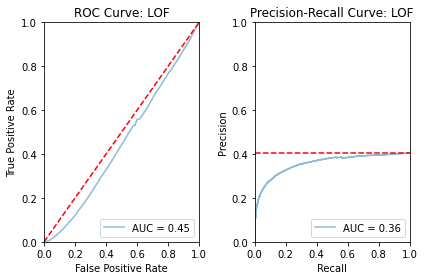

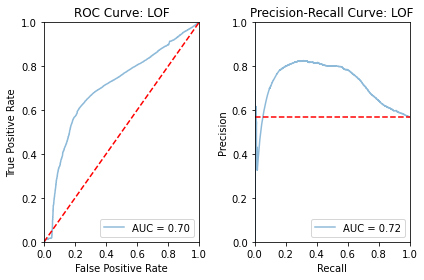

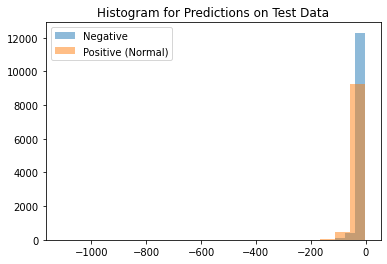

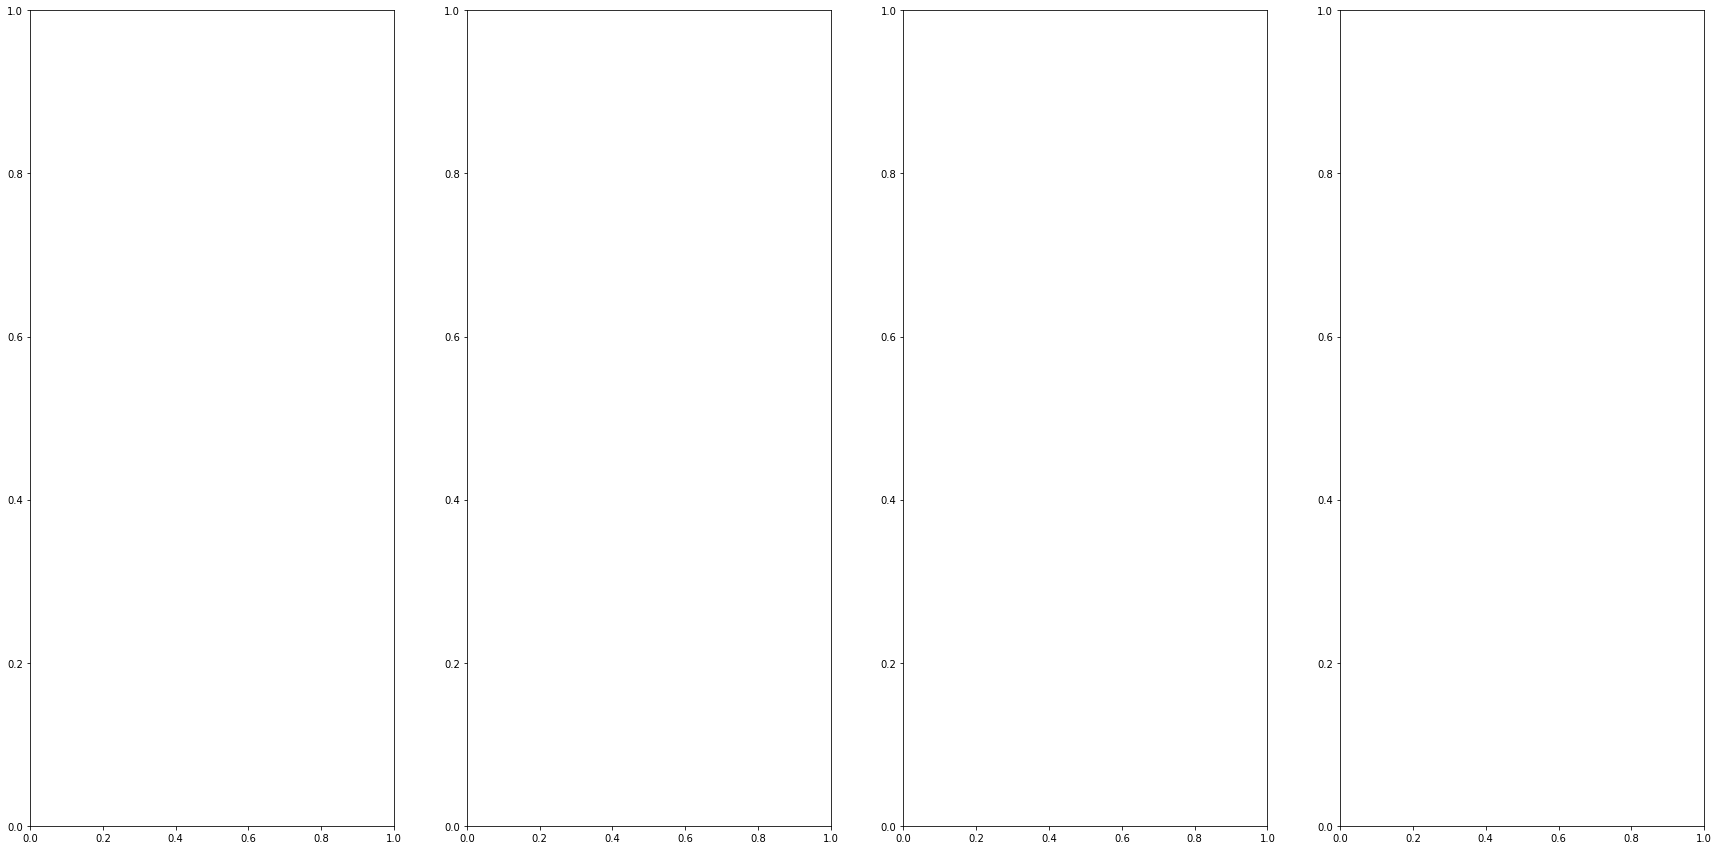

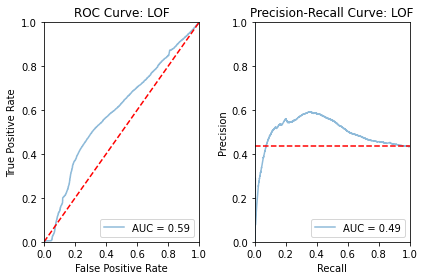

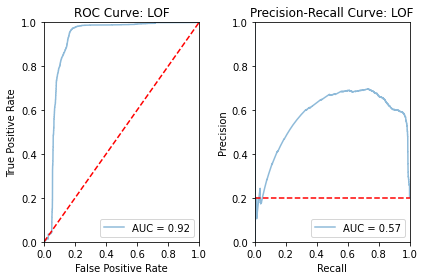

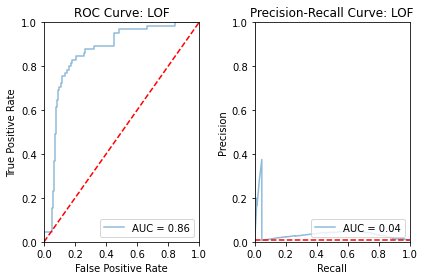

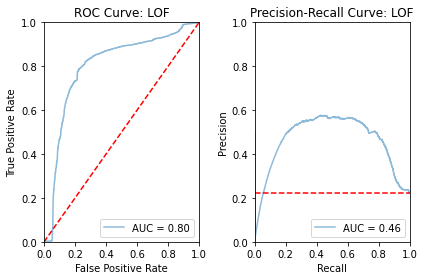

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


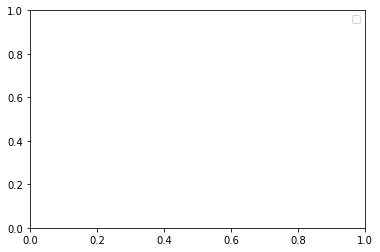

AUPR (Train): 0.35756333836270904+-0.0
AUPR (Test): 0.7184306373293136+-0.0


,0,AUPR Mean,AUPR Std
1,0.494760,0.494760,NaN
2,0.566976,0.566976,NaN
3,0.039250,0.039250,NaN
4,0.455199,0.455199,NaN


([0.35756333836270904],
 [0.7184306373293136],
 {0: [0.49476040843222563,
   0.5669762676691681,
   0.0392500554419305,
   0.45519852756271584]})

In [21]:
model_name ="LOF"
# params_dict = {
#     "n_neighbors": [5, 10, 15],
#     "contamination": ["auto", 1 - np.sum(y)/len(y)],
#     "leaf_size": [30, 8],
#     "novelty": [True]
#          }

# best_params = cross_validate_unsupervised(LOF, params_dict, model_name, seed=False)
best_params = {
    "n_neighbors": 5,
    "contamination": 1 - np.sum(y)/len(y),
    "leaf_size": 30,
    "novelty": True
         }
print(best_params)

auprs_test = []
auprs_train = []
aupr_attacks = dict()

repeats = 1

indiv=new_attacks
att_labels=test_df['attack_map']
plot = True

for N in range(repeats):

    model = LOF(**best_params)
    
    model.fit(X)
    
    y_train = model.score_samples(X)
    aupr_train = get_metrics(y_train, y, model_name, plot=plot, pos_label=0)
    
    y_pred = model.score_samples(x_test)
    aupr_test = get_metrics(y_pred, y_test, model_name, plot=plot, pos_label=0)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attack = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attack.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model_name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    
    aupr_attacks[N] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks